In [5]:
!pip install tensorflow
!pip install tensorflow scikit-learn
!pip install keras-tuner


In [6]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [7]:
import tensorflow
import keras, pandas, matplotlib, numpy

In [8]:
import os

# Print the contents of the current directory
print(os.listdir())

['.config', 'Airline_Delay_Cause.csv', 'sample_data']


In [9]:
import pandas as pd

# Load the dataset
file_path = '/content/Airline_Delay_Cause.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92158 entries, 0 to 92157
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 92158 non-null  int64  
 1   month                92158 non-null  int64  
 2   carrier              92158 non-null  object 
 3   carrier_name         92158 non-null  object 
 4   airport              92158 non-null  object 
 5   airport_name         92158 non-null  object 
 6   arr_flights          91913 non-null  float64
 7   arr_del15            91682 non-null  float64
 8   carrier_ct           91913 non-null  float64
 9   weather_ct           91913 non-null  float64
 10  nas_ct               91913 non-null  float64
 11  security_ct          91913 non-null  float64
 12  late_aircraft_ct     91913 non-null  float64
 13  arr_cancelled        91913 non-null  float64
 14  arr_diverted         91913 non-null  float64
 15  arr_delay            91913 non-null 

(   year  month carrier       carrier_name airport  \
 0  2024      1      9E  Endeavor Air Inc.     ABE   
 1  2024      1      9E  Endeavor Air Inc.     ABY   
 2  2024      1      9E  Endeavor Air Inc.     AEX   
 3  2024      1      9E  Endeavor Air Inc.     AGS   
 4  2024      1      9E  Endeavor Air Inc.     ALB   
 
                                         airport_name  arr_flights  arr_del15  \
 0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         80.0       16.0   
 1             Albany, GA: Southwest Georgia Regional          3.0        0.0   
 2           Alexandria, LA: Alexandria International         62.0        9.0   
 3        Augusta, GA: Augusta Regional at Bush Field         74.0       15.0   
 4                   Albany, NY: Albany International        101.0       23.0   
 
    carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
 0        4.78        2.56  ...          0.0              6.68            0.0   
 1        0.00        0.

In [10]:
data.head(20)

year  month carrier       carrier_name airport  \
0   2024      1      9E  Endeavor Air Inc.     ABE   
1   2024      1      9E  Endeavor Air Inc.     ABY   
2   2024      1      9E  Endeavor Air Inc.     AEX   
3   2024      1      9E  Endeavor Air Inc.     AGS   
4   2024      1      9E  Endeavor Air Inc.     ALB   
5   2024      1      9E  Endeavor Air Inc.     ATL   
6   2024      1      9E  Endeavor Air Inc.     ATW   
7   2024      1      9E  Endeavor Air Inc.     AUS   
8   2024      1      9E  Endeavor Air Inc.     AVL   
9   2024      1      9E  Endeavor Air Inc.     AZO   
10  2024      1      9E  Endeavor Air Inc.     BDL   
11  2024      1      9E  Endeavor Air Inc.     BGM   
12  2024      1      9E  Endeavor Air Inc.     BGR   
13  2024      1      9E  Endeavor Air Inc.     BHM   
14  2024      1      9E  Endeavor Air Inc.     BMI   
15  2024      1      9E  Endeavor Air Inc.     BNA   
16  2024      1      9E  Endeavor Air Inc.     BOS   
17  2024      1      9E  Endeavor Air Inc.     BTR   
18  2024      1      9E  Endeavor Air Inc.     BTV   
19  2024      1      9E  Endeavor Air Inc.     BUF   

                                         airport_name  arr_flights  arr_del15  \
0   Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         80.0       16.0   
1              Albany, GA: Southwest Georgia Regional          3.0        0.0   
2            Alexandria, LA: Alexandria International         62.0        9.0   
3         Augusta, GA: Augusta Regional at Bush Field         74.0       15.0   
4                    Albany, NY: Albany International        101.0       23.0   
5   Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2511.0      621.0   
6                Appleton, WI: Appleton International         20.0        1.0   
7        Austin, TX: Austin - Bergstrom International         47.0       15.0   
8                   Asheville, NC: Asheville Regional         48.0        9.0   
9   Kalamazoo, MI: Kalamazoo/Battle Creek Internat...         13.0        2.0   
10                Hartford, CT: Bradley International         53.0       12.0   
11  Binghamton, NY: Greater Binghamton/Edwin A. Li...         32.0        9.0   
12                   Bangor, ME: Bangor International         88.0       19.0   
13  Birmingham, AL: Birmingham-Shuttlesworth Inter...        105.0       25.0   
14  Bloomington/Normal, IL: Central Il Regional Ai...         62.0       17.0   
15             Nashville, TN: Nashville International         81.0       15.0   
16                    Boston, MA: Logan International          7.0        0.0   
17  Baton Rouge, LA: Baton Rouge Metropolitan/Ryan...         83.0       25.0   
18           Burlington, VT: Burlington International        129.0       33.0   
19         Buffalo, NY: Buffalo Niagara International        142.0       27.0   

    carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0         4.78        2.56  ...          0.0              6.68            0.0   
1         0.00        0.00  ...          0.0              0.00            0.0   
2         2.20        0.92  ...          0.0              4.49            2.0   
3         6.24        0.00  ...          0.0              6.10            1.0   
4         3.27        1.29  ...          0.0              8.75            5.0   
5       120.86       28.26  ...          0.0            313.87           68.0   
6         0.00        0.00  ...          0.0              1.00            0.0   
7         4.02        0.00  ...          0.0              1.00            1.0   
8         3.33        0.00  ...          0.0              0.80            0.0   
9         0.00        0.00  ...          0.0              0.00            0.0   
10        0.92        0.40  ...          0.0              6.83            3.0   
11        2.81        2.33  ...          0.0              2.43            5.0   
12        3.54        1.00  ...          0.0              6.61            7.0   
13        6.00        1.76  ...  

In [11]:
data.tail(20)

year  month carrier                 carrier_name airport  \
92138  2020      1      ZW  Air Wisconsin Airlines Corp     ORF   
92139  2020      1      ZW  Air Wisconsin Airlines Corp     PIA   
92140  2020      1      ZW  Air Wisconsin Airlines Corp     PIT   
92141  2020      1      ZW  Air Wisconsin Airlines Corp     PVD   
92142  2020      1      ZW  Air Wisconsin Airlines Corp     PWM   
92143  2020      1      ZW  Air Wisconsin Airlines Corp     RAP   
92144  2020      1      ZW  Air Wisconsin Airlines Corp     RDU   
92145  2020      1      ZW  Air Wisconsin Airlines Corp     RIC   
92146  2020      1      ZW  Air Wisconsin Airlines Corp     ROA   
92147  2020      1      ZW  Air Wisconsin Airlines Corp     ROC   
92148  2020      1      ZW  Air Wisconsin Airlines Corp     RST   
92149  2020      1      ZW  Air Wisconsin Airlines Corp     SAV   
92150  2020      1      ZW  Air Wisconsin Airlines Corp     SBN   
92151  2020      1      ZW  Air Wisconsin Airlines Corp     SCE   
92152  2020      1      ZW  Air Wisconsin Airlines Corp     SDF   
92153  2020      1      ZW  Air Wisconsin Airlines Corp     SGF   
92154  2020      1      ZW  Air Wisconsin Airlines Corp     STL   
92155  2020      1      ZW  Air Wisconsin Airlines Corp     SYR   
92156  2020      1      ZW  Air Wisconsin Airlines Corp     TVC   
92157  2020      1      ZW  Air Wisconsin Airlines Corp     TYS   

                                            airport_name  arr_flights  \
92138                 Norfolk, VA: Norfolk International         90.0   
92139  Peoria, IL: General Downing - Peoria Internati...         59.0   
92140           Pittsburgh, PA: Pittsburgh International         19.0   
92141       Providence, RI: Theodore Francis Green State         43.0   
92142       Portland, ME: Portland International Jetport          8.0   
92143                Rapid City, SD: Rapid City Regional          5.0   
92144   Raleigh/Durham, NC: Raleigh-Durham International         17.0   
92145               Richmond, VA: Richmond International         94.0   
92146  Roanoke, VA: Roanoke Blacksburg Regional Woodr...         66.0   
92147     Rochester, NY: Greater Rochester International         74.0   
92148             Rochester, MN: Rochester International         91.0   
92149   Savannah, GA: Savannah/Hilton Head International         91.0   
92150           South Bend, IN: South Bend International         16.0   
92151                 State College, PA: University Park        137.0   
92152  Louisville, KY: Louisville Muhammad Ali Intern...         60.0   
92153      Springfield, MO: Springfield-Branson National         48.0   
92154      St. Louis, MO: St Louis Lambert International         69.0   
92155       Syracuse, NY: Syracuse Hancock International         58.0   
92156                  Traverse City, MI: Cherry Capital         32.0   
92157                        Knoxville, TN: McGhee Tyson        102.0   

       arr_del15  carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  \
92138       14.0        2.35        1.28  ...          0.0              6.29   
92139       11.0        2.83        0.00  ...          0.0              5.95   
92140        3.0        0.13        0.02  ...          0.0              2.32   
92141        2.0        1.06        0.00  ...          0.0              0.94   
92142        2.0        0.93        0.00  ...          0.0              0.00   
92143        1.0        0.00        0.00  ...          0.0              1.00   
92144        4.0        2.52        0.08  ...          0.0              0.92   
92145        8.0        2.61        0.00  ...          0.0              4.13   
92146        9.0        4.85        0.23  ...          0.0              1.00   
92147       10.0        1.52        1.24  ...          0.0              3.57   
92148       23.0        5.32        0.00  ...          0.0              7.93   
92149       17.0        4.00        0.70  ...          0.0              3.61   
92150        5.0        1

In [12]:
# Display basic statistics
data.describe()


year         month   arr_flights     arr_del15    carrier_ct  \
count  92158.000000  92158.000000  91913.000000  91682.000000  91913.000000   
mean    2021.564476      6.340198    285.149435     49.763672     17.899343   
std        1.155435      3.523392    831.834924    151.440798     49.627942   
min     2020.000000      1.000000      1.000000      0.000000      0.000000   
25%     2021.000000      3.000000     32.000000      4.000000      1.450000   
50%     2022.000000      6.000000     78.000000     12.000000      4.620000   
75%     2023.000000      9.000000    186.000000     32.000000     13.230000   
max     2024.000000     12.000000  20669.000000   4142.000000   1293.910000   

         weather_ct        nas_ct   security_ct  late_aircraft_ct  \
count  91913.000000  91913.000000  91913.000000      91913.000000   
mean       1.933275     12.894526      0.170016         16.741437   
std        7.245616     44.811862      0.836076         60.189543   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.340000      0.000000          0.650000   
50%        0.040000      2.400000      0.000000          2.940000   
75%        1.430000      7.570000      0.000000          9.510000   
max      266.420000   1391.740000     58.690000       2069.070000   

       arr_cancelled  arr_diverted      arr_delay  carrier_delay  \
count   91913.000000  91913.000000   91913.000000   91913.000000   
mean        7.812616      0.647243    3371.915409    1295.114772   
std        52.906699      2.988240   11485.646408    4391.211466   
min         0.000000      0.000000       0.000000       0.000000   
25%         0.000000      0.000000     212.000000      67.000000   
50%         1.000000      0.000000     704.000000     260.000000   
75%         3.000000      0.000000    2105.000000     881.000000   
max      4951.000000    154.000000  438783.000000  162563.000000   

       weather_delay     nas_delay  security_delay  late_aircraft_delay  
count   91913.000000  91913.000000    91913.000000         91913.000000  
mean      206.173871    595.319541        7.873435          1267.407733  
std       852.790402   2330.617098       45.986051          4823.919834  
min         0.000000      0.000000        0.000000             0.000000  
25%         0.000000     13.000000        0.000000            20.000000  
50%         3.000000     89.000000        0.000000           188.000000  
75%       117.000000    303.000000        0.000000           724.000000  
max     29299.000000  84155.000000     3760.000000        227959.000000

In [13]:
# Check for missing values
data.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            245
arr_del15              476
carrier_ct             245
weather_ct             245
nas_ct                 245
security_ct            245
late_aircraft_ct       245
arr_cancelled          245
arr_diverted           245
arr_delay              245
carrier_delay          245
weather_delay          245
nas_delay              245
security_delay         245
late_aircraft_delay    245
dtype: int64

In [14]:
# Impute missing values with zero for each column in 'data'
for column in data.columns:
    if data[column].isnull().sum() > 0:  # only apply to columns with missing values
        data[column].fillna(0, inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [15]:
data.isnull().sum()


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [16]:
data.describe()


year         month   arr_flights     arr_del15    carrier_ct  \
count  92158.000000  92158.000000  92158.000000  92158.000000  92158.000000   
mean    2021.564476      6.340198    284.391371     49.506641     17.851758   
std        1.155435      3.523392    830.858217    151.091304     49.570499   
min     2020.000000      1.000000      0.000000      0.000000      0.000000   
25%     2021.000000      3.000000     32.000000      4.000000      1.420000   
50%     2022.000000      6.000000     78.000000     12.000000      4.590000   
75%     2023.000000      9.000000    186.000000     32.000000     13.180000   
max     2024.000000     12.000000  20669.000000   4142.000000   1293.910000   

         weather_ct        nas_ct   security_ct  late_aircraft_ct  \
count  92158.000000  92158.000000  92158.000000      92158.000000   
mean       1.928136     12.860246      0.169564         16.696930   
std        7.236663     44.757181      0.835010         60.115663   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.320000      0.000000          0.630000   
50%        0.030000      2.385000      0.000000          2.920000   
75%        1.420000      7.530000      0.000000          9.477500   
max      266.420000   1391.740000     58.690000       2069.070000   

       arr_cancelled  arr_diverted      arr_delay  carrier_delay  \
count   92158.000000  92158.000000   92158.000000   92158.000000   
mean        7.791847      0.645522    3362.951247    1291.671738   
std        52.837857      2.984452   11471.682936    4385.877582   
min         0.000000      0.000000       0.000000       0.000000   
25%         0.000000      0.000000     209.000000      66.000000   
50%         1.000000      0.000000     700.000000     259.000000   
75%         3.000000      0.000000    2098.000000     877.000000   
max      4951.000000    154.000000  438783.000000  162563.000000   

       weather_delay     nas_delay  security_delay  late_aircraft_delay  
count   92158.000000  92158.000000    92158.000000         92158.000000  
mean      205.625762    593.736898        7.852503          1264.038358  
std       851.722239   2327.718912       45.926673          4817.945375  
min         0.000000      0.000000        0.000000             0.000000  
25%         0.000000     13.000000        0.000000            20.000000  
50%         2.000000     88.000000        0.000000           186.000000  
75%       116.000000    302.000000        0.000000           720.000000  
max     29299.000000  84155.000000     3760.000000        227959.000000

In [17]:
!pip install numpy
import numpy as np

import pandas as pd

# Set display options to not use scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate the sum of each numeric column in the dataset
column_sums = data.select_dtypes(include=[np.number]).sum()

# Print the sums for each column
print(column_sums)

year                  186303339.00
month                    584300.00
arr_flights            26208940.00
arr_del15               4562433.00
carrier_ct              1645182.33
weather_ct               177693.12
nas_ct                  1185174.53
security_ct               15626.70
late_aircraft_ct        1538755.72
arr_cancelled            718081.00
arr_diverted              59490.00
arr_delay             309922861.00
carrier_delay         119037884.00
weather_delay          18950059.00
nas_delay              54717605.00
security_delay           723671.00
late_aircraft_delay   116491247.00
dtype: float64


In [18]:
import pandas as pd

# Assuming you have loaded your data into a DataFrame called `data`
print("Summary Statistics for arr_flights and arr_del15:")
print(data[['arr_flights', 'arr_del15']].describe())

# Check for any negative values or anomalies
print("\nCheck for negative or zero values in arr_flights:")
print(data[data['arr_flights'] <= 0])

print("\nCheck for negative values in arr_del15:")
print(data[data['arr_del15'] < 0])

# Recalculate the on_time_flights to verify the counts
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']
print("\nRecalculated On-Time Flights:")
print(data['on_time_flights'].describe())

# Check if the total number of on-time flights matches the expected number
total_on_time_flights = data['on_time_flights'].sum()
print(f"\nTotal recalculated on-time flights: {total_on_time_flights}")


Summary Statistics for arr_flights and arr_del15:
       arr_flights  arr_del15
count     92158.00   92158.00
mean        284.39      49.51
std         830.86     151.09
min           0.00       0.00
25%          32.00       4.00
50%          78.00      12.00
75%         186.00      32.00
max       20669.00    4142.00

Check for negative or zero values in arr_flights:
       year  month carrier                             carrier_name airport  \
534    2024      1      NK                          Spirit Airlines     LFT   
689    2024      1      OO                    SkyWest Airlines Inc.     BPT   
1569   2024      1      G7  GoJet Airlines LLC d/b/a United Express     CAK   
2676   2023     12      UA                 United Air Lines Network     BHM   
3151   2023     12      G7  GoJet Airlines LLC d/b/a United Express     SBN   
...     ...    ...     ...                                      ...     ...   
87458  2020      3      YV                       Mesa Airlines Inc.     HRL 

In [19]:
# Assuming 'data' is your pandas DataFrame
shape_of_dataset = data.shape

# Print the shape
print("Shape of the dataset:", shape_of_dataset)

Shape of the dataset: (92158, 22)


In [20]:
!pip install matplotlib


In [21]:
import matplotlib
print(matplotlib.__version__)


3.7.1


   year  month carrier       carrier_name airport  \
0  2024      1      9E  Endeavor Air Inc.     ABE   
1  2024      1      9E  Endeavor Air Inc.     ABY   
2  2024      1      9E  Endeavor Air Inc.     AEX   
3  2024      1      9E  Endeavor Air Inc.     AGS   
4  2024      1      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...        80.00      16.00   
1             Albany, GA: Southwest Georgia Regional         3.00       0.00   
2           Alexandria, LA: Alexandria International        62.00       9.00   
3        Augusta, GA: Augusta Regional at Bush Field        74.00      15.00   
4                   Albany, NY: Albany International       101.00      23.00   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        4.78        2.56  ...         0.00              6.68           0.00   
1        0.00        0.00  ...         0

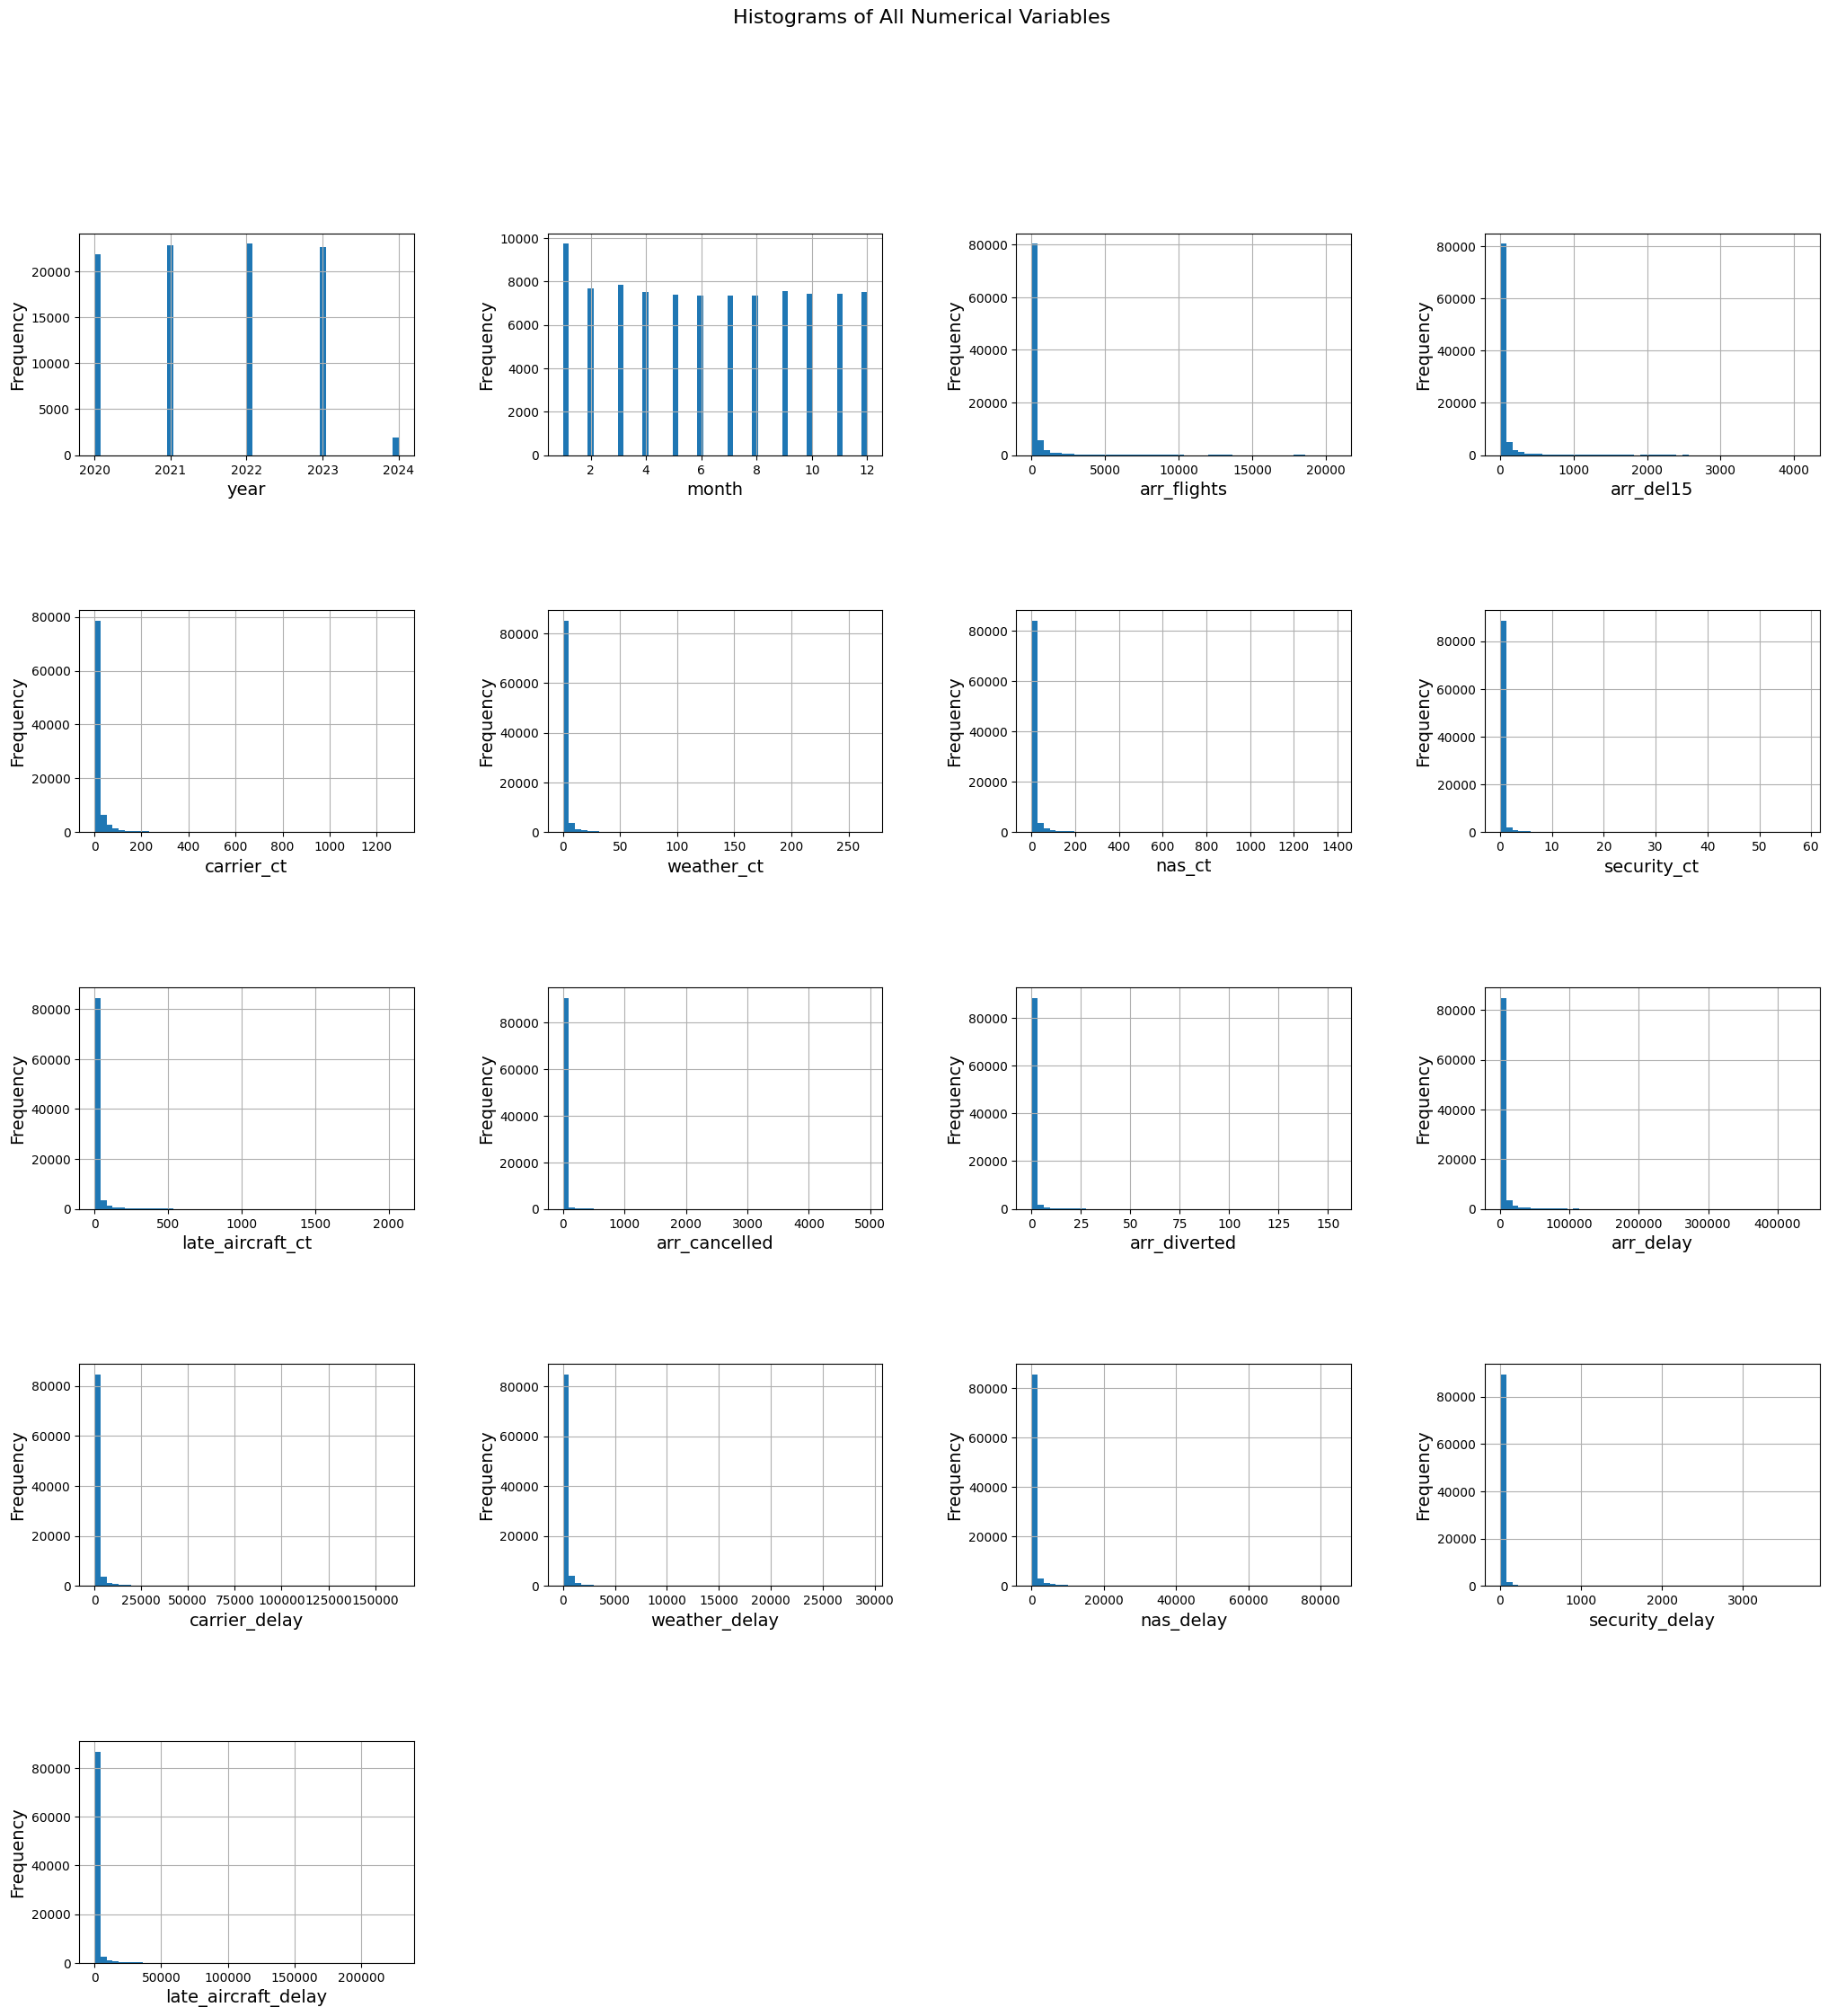

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Check the first few rows to ensure the data is loaded correctly
print(data.head())

# Plotting histograms for all numerical data, with increased figure size for better visibility
data.hist(bins=50, figsize=(25, 25))  # Increased figure size
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Adjust spacing to prevent label overlap
plt.suptitle('Histograms of All Numerical Variables', size=16)
for ax in plt.gcf().axes:  # Loop through all axes to label them
    ax.set_xlabel(ax.get_title(), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('')  # Clear the default title
plt.show()


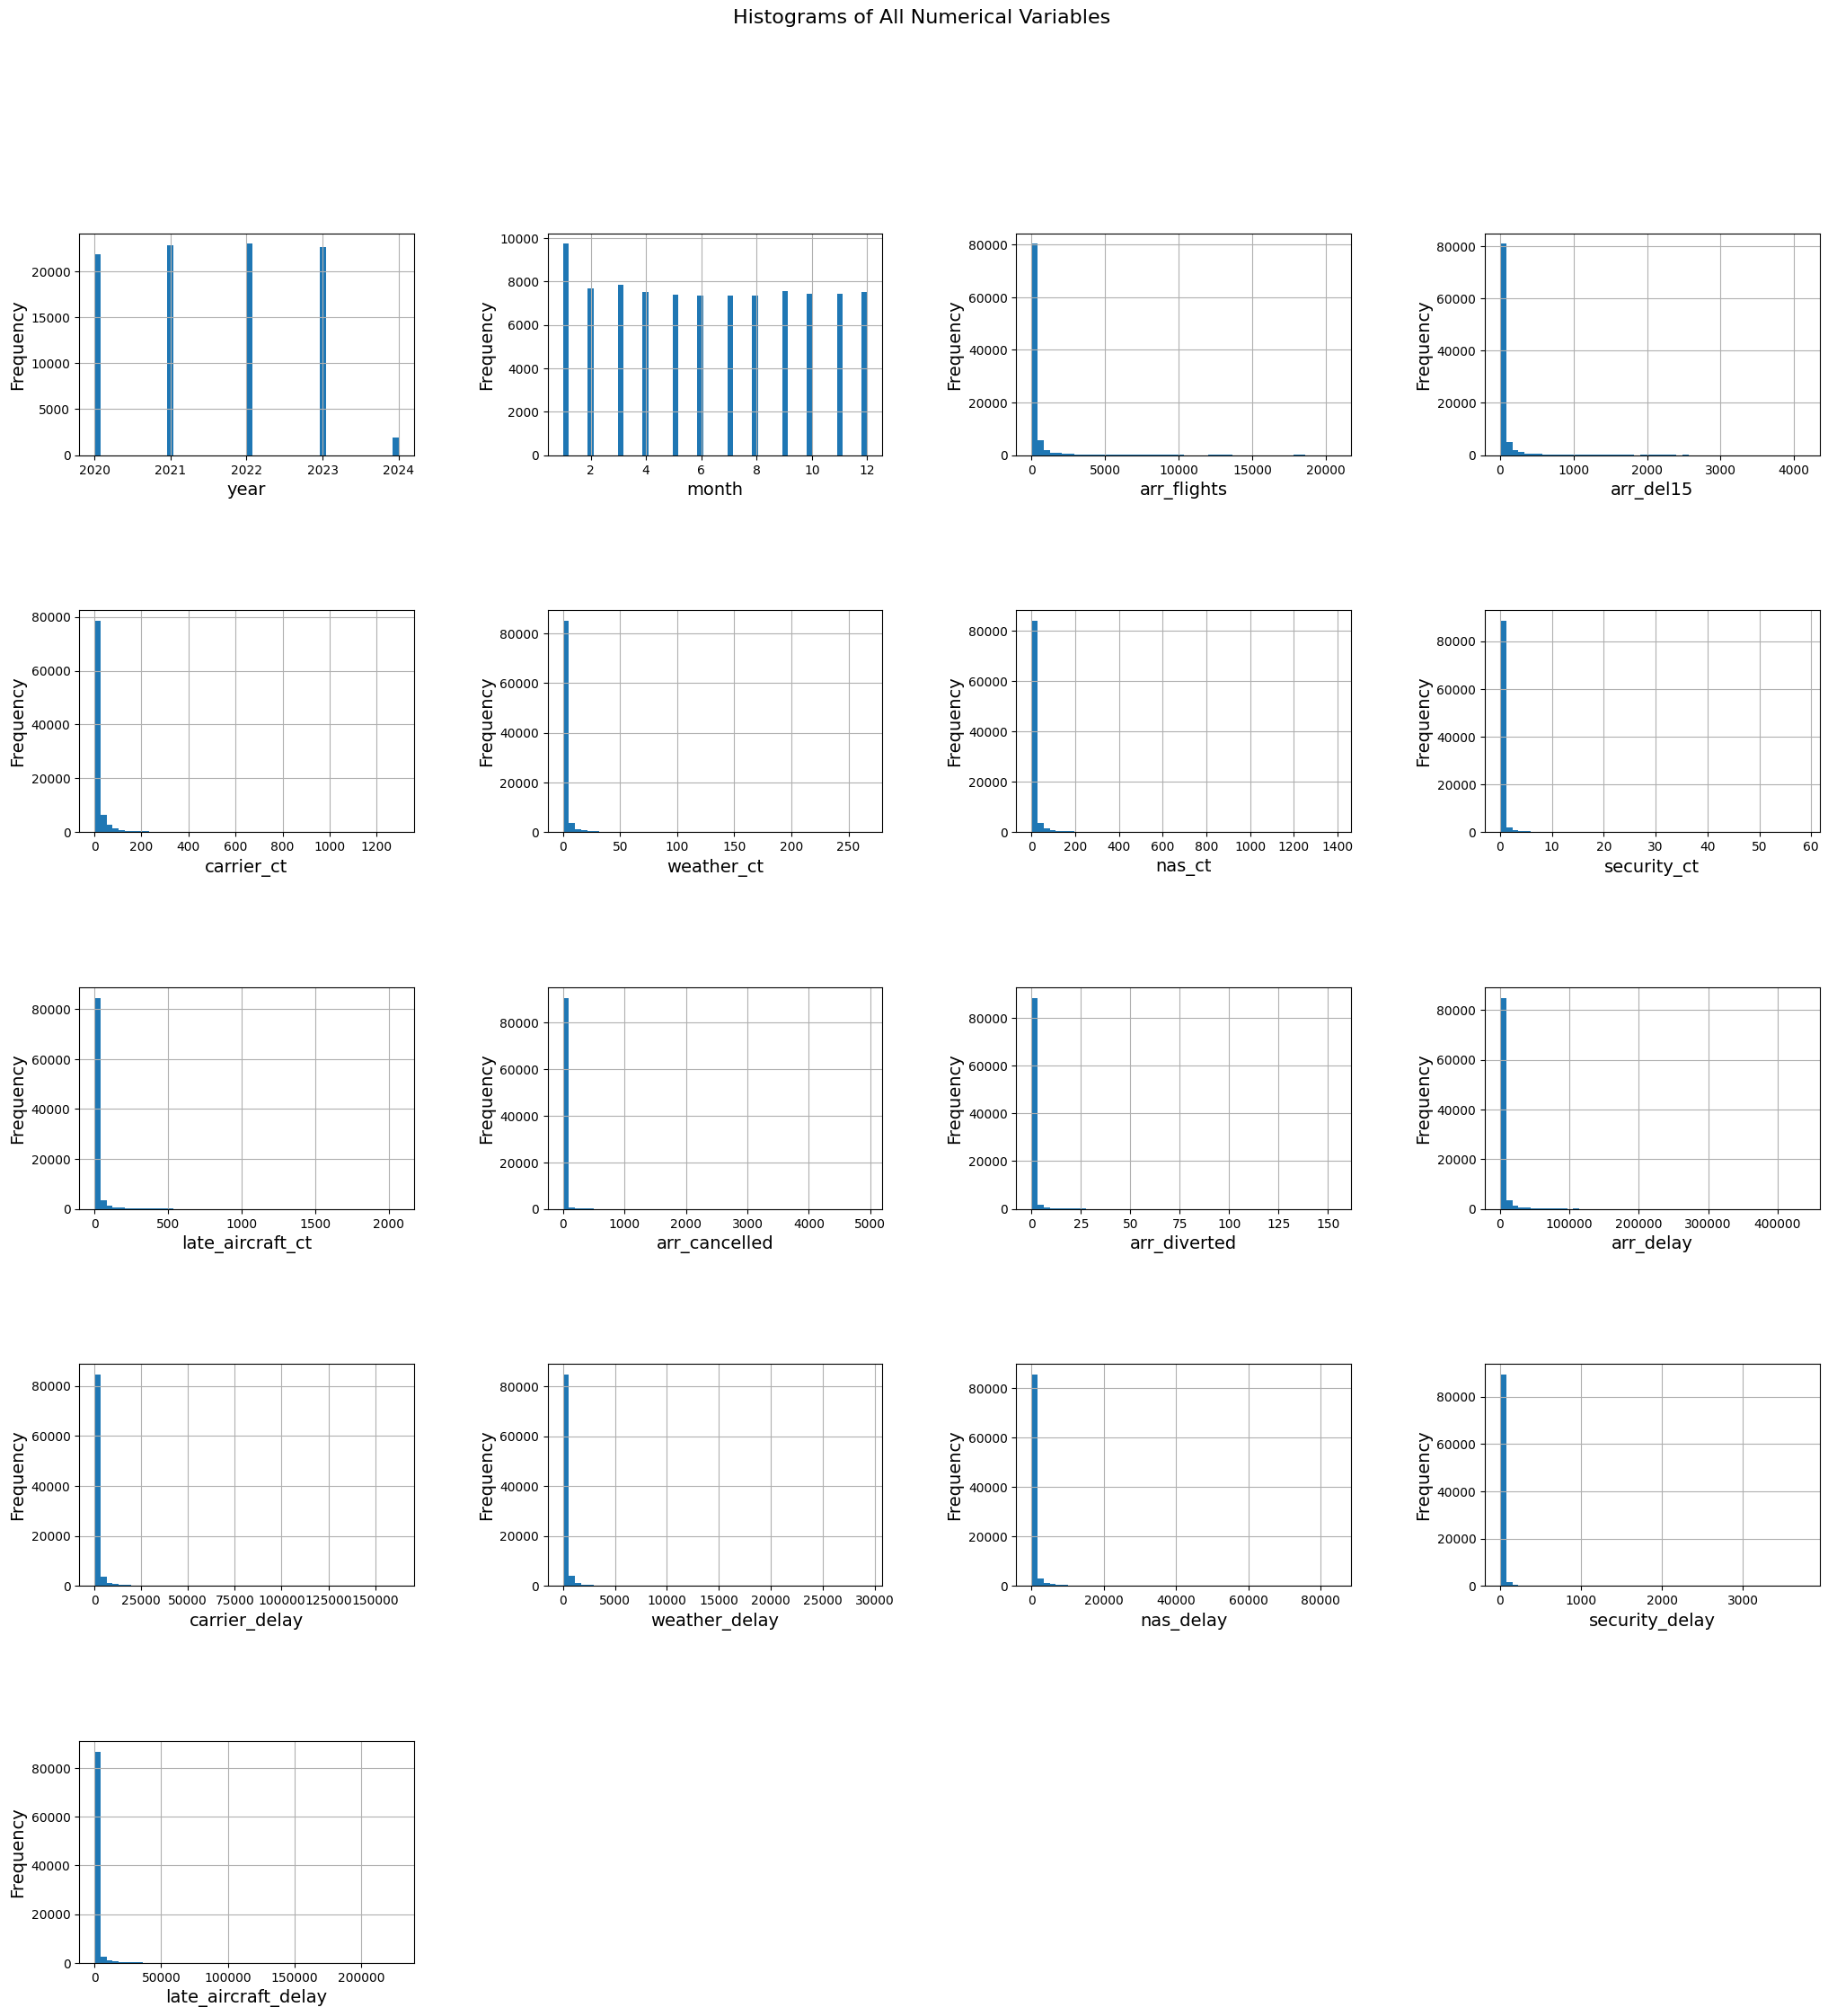

In [23]:
import matplotlib.pyplot as plt

# Histograms for all numerical data, with increased figure size for better visibility
data.hist(bins=50, figsize=(25, 25))  # Increased figure size
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Adjust spacing to prevent label overlap
plt.suptitle('Histograms of All Numerical Variables', size=16)
for ax in plt.gcf().axes:  # Loop through all axes to label them
    ax.set_xlabel(ax.get_title(), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('')  # Clear the default title
plt.show()

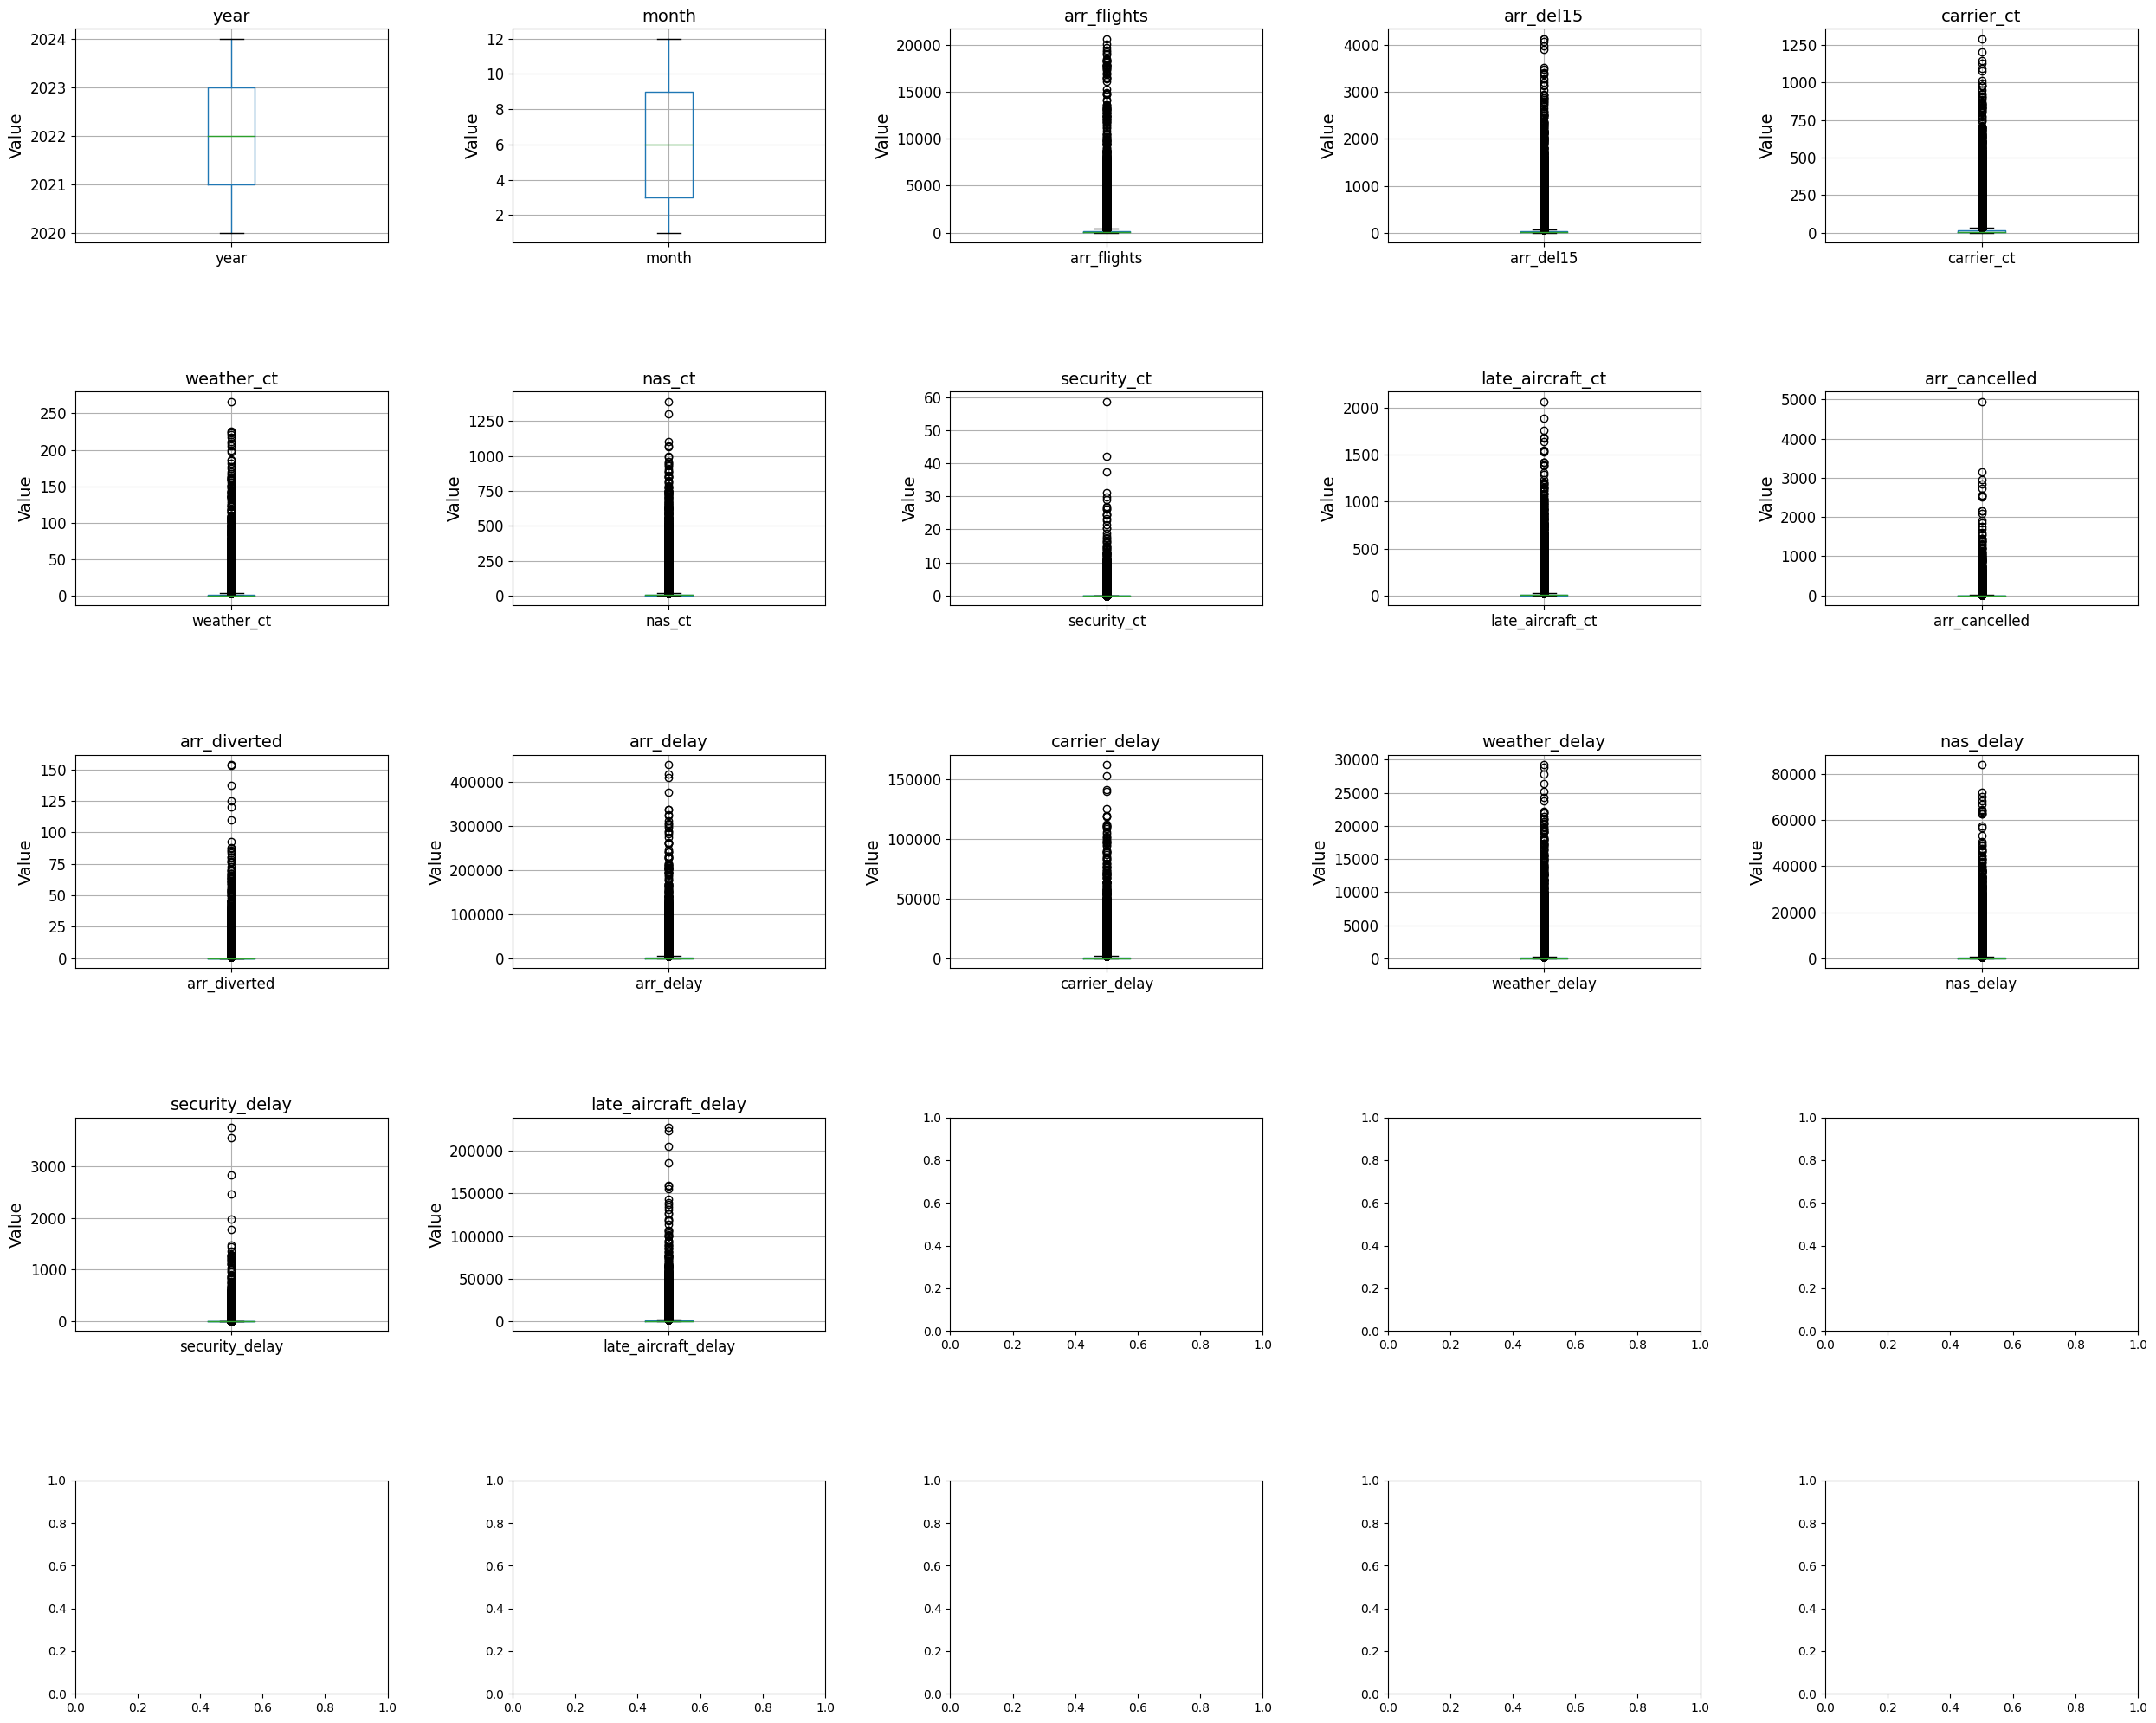

In [24]:
# Box plots to check for outliers, with adjusted sizes for better readability
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))  # Adjust layout based on number of variables and figure size
axs = axs.flatten()  # Flatten to 1D array for easy iteration
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    data.boxplot(column=col, ax=axs[i], fontsize=12)
    axs[i].set_title(col, fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Value', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

In [25]:
# Check columns in the dataset that contain 'delay' in their name
delay_columns = [col for col in data.columns if 'delay' in col]
print("Delay-related columns in the dataset:", delay_columns)


Delay-related columns in the dataset: ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [26]:
# Summing up each type of delay across all records
total_carrier_delay = data['carrier_delay'].sum()
total_weather_delay = data['weather_delay'].sum()
total_nas_delay = data['nas_delay'].sum()
total_security_delay = data['security_delay'].sum()
total_late_aircraft_delay = data['late_aircraft_delay'].sum()

# Calculating the overall total delay from the specific types
total_specific_delays = (total_carrier_delay +
                         total_weather_delay +
                         total_nas_delay +
                         total_security_delay +
                         total_late_aircraft_delay)

# Printing the results
print(f"Total Carrier Delay: {total_carrier_delay} minutes")
print(f"Total Weather Delay: {total_weather_delay} minutes")
print(f"Total NAS Delay: {total_nas_delay} minutes")
print(f"Total Security Delay: {total_security_delay} minutes")
print(f"Total Late Aircraft Delay: {total_late_aircraft_delay} minutes")
print(f"Overall Total Specific Delays: {total_specific_delays} minutes")

# If you need the total of 'arr_delay' as well to compare
total_arr_delay = data['arr_delay'].sum()
print(f"Total Arrival Delay: {total_arr_delay} minutes")

Total Carrier Delay: 119037884.0 minutes
Total Weather Delay: 18950059.0 minutes
Total NAS Delay: 54717605.0 minutes
Total Security Delay: 723671.0 minutes
Total Late Aircraft Delay: 116491247.0 minutes
Overall Total Specific Delays: 309920466.0 minutes
Total Arrival Delay: 309922861.0 minutes


In [27]:
import pandas as pd

# Calculate the sum of specific delay types for each record
data['calculated_delay'] = data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

# Filter to find instances where the sum of specific delays exceeds the total reported arrival delay
overlapping_delays = data[data['calculated_delay'] > data['arr_delay']]

# Display these instances to investigate further
overlapping_delays[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'calculated_delay']]

Empty DataFrame
Columns: [arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, calculated_delay]
Index: []

In [28]:
# Count of overlapping instances
count_overlaps = overlapping_delays.shape[0]

# Percentage of overlapping instances compared to total records
percentage_overlaps = (count_overlaps / data.shape[0]) * 100

print(f"Count of overlapping delay instances: {count_overlaps}")
print(f"Percentage of overlapping delay instances: {percentage_overlaps:.2f}%")

Count of overlapping delay instances: 0
Percentage of overlapping delay instances: 0.00%


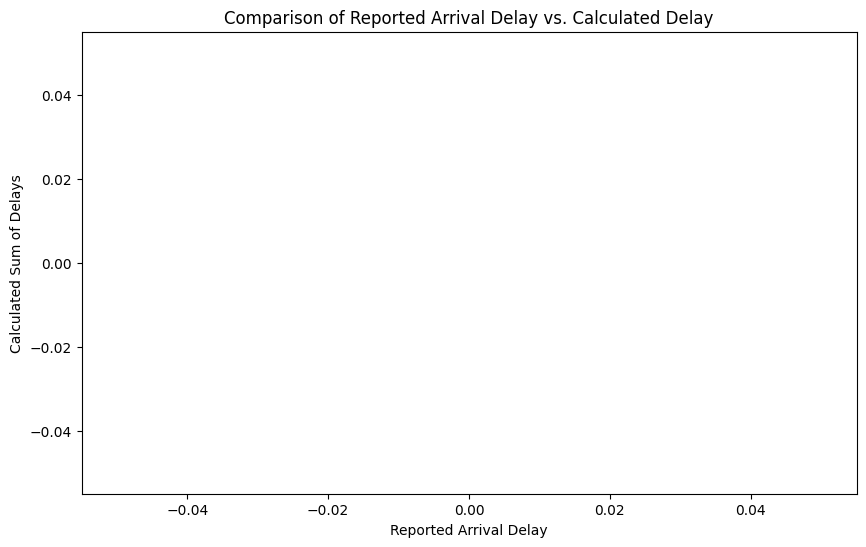

In [29]:
import matplotlib.pyplot as plt

# Plotting examples where overlaps occur
plt.figure(figsize=(10, 6))
plt.scatter(overlapping_delays['arr_delay'], overlapping_delays['calculated_delay'], alpha=0.5)
plt.title('Comparison of Reported Arrival Delay vs. Calculated Delay')
plt.xlabel('Reported Arrival Delay')
plt.ylabel('Calculated Sum of Delays')
plt.plot([0, max(overlapping_delays['arr_delay'].max(), overlapping_delays['calculated_delay'].max())],
         [0, max(overlapping_delays['arr_delay'].max(), overlapping_delays['calculated_delay'].max())],
         'r--')  # Adding a reference line
plt.show()

In [30]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the delay data

# Calculate the sum of specific types of delays for each record
data['calculated_delay'] = data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

# Calculate total values for both 'arr_delay' and 'calculated_delay' across all records
total_arr_delay = data['arr_delay'].sum()
total_calculated_delay = data['calculated_delay'].sum()

# Display the total delays calculated and reported
print(f"Total Reported Arrival Delay (arr_delay): {total_arr_delay} minutes")
print(f"Total Calculated Delay (sum of specific delays): {total_calculated_delay} minutes")

# Calculate and display the difference
difference = total_arr_delay - total_calculated_delay
print(f"Difference between reported and calculated delays: {difference} minutes")

Total Reported Arrival Delay (arr_delay): 309922861.0 minutes
Total Calculated Delay (sum of specific delays): 309920466.0 minutes
Difference between reported and calculated delays: 2395.0 minutes


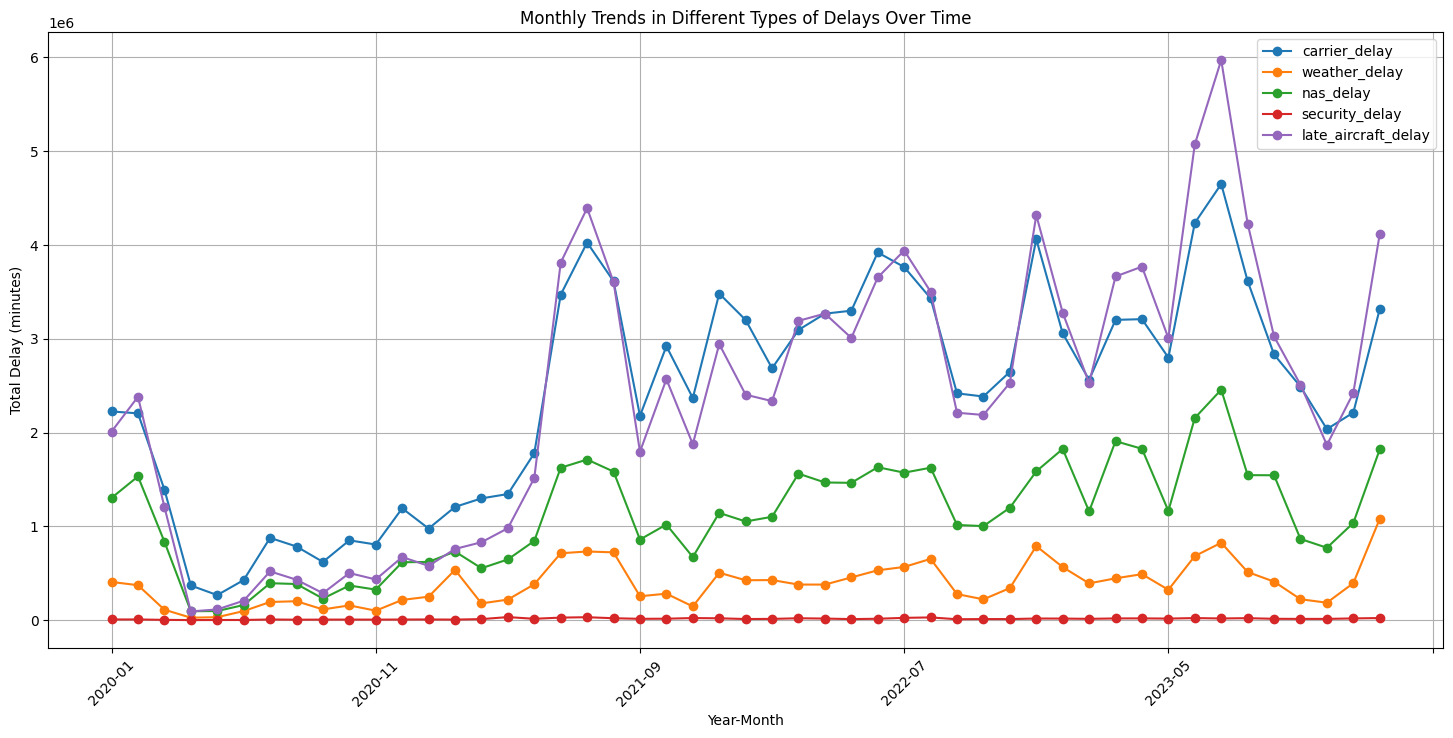

In [31]:
import matplotlib.pyplot as plt

# Creating a 'year_month' column for grouping
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Grouping data by 'year_month'
monthly_delays = data.groupby('year_month')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

# Plotting trends for each type of delay
monthly_delays.plot(figsize=(18, 8), marker='o', title='Monthly Trends in Different Types of Delays Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


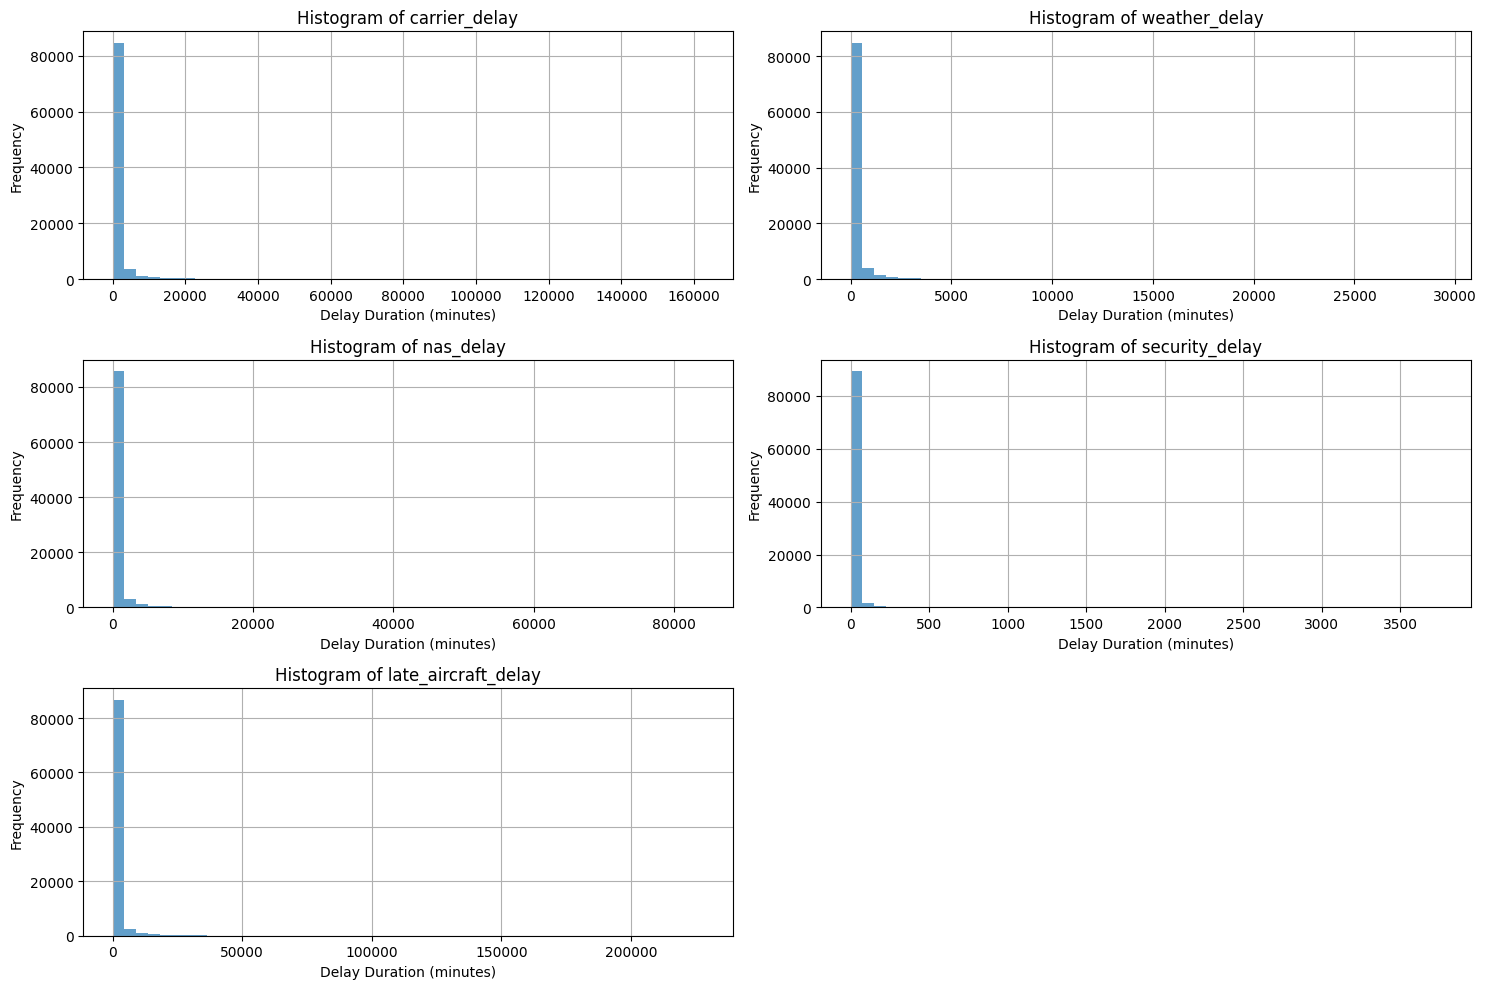

In [32]:
import matplotlib.pyplot as plt

# List of delay types
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Setting up the figure size and number of subplots
plt.figure(figsize=(15, 10))

for i, delay_type in enumerate(delay_types, 1):
    plt.subplot(3, 2, i)  # Adjust grid definition dynamically
    data[delay_type].hist(bins=50, alpha=0.7)
    plt.title(f'Histogram of {delay_type}')
    plt.xlabel('Delay Duration (minutes)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


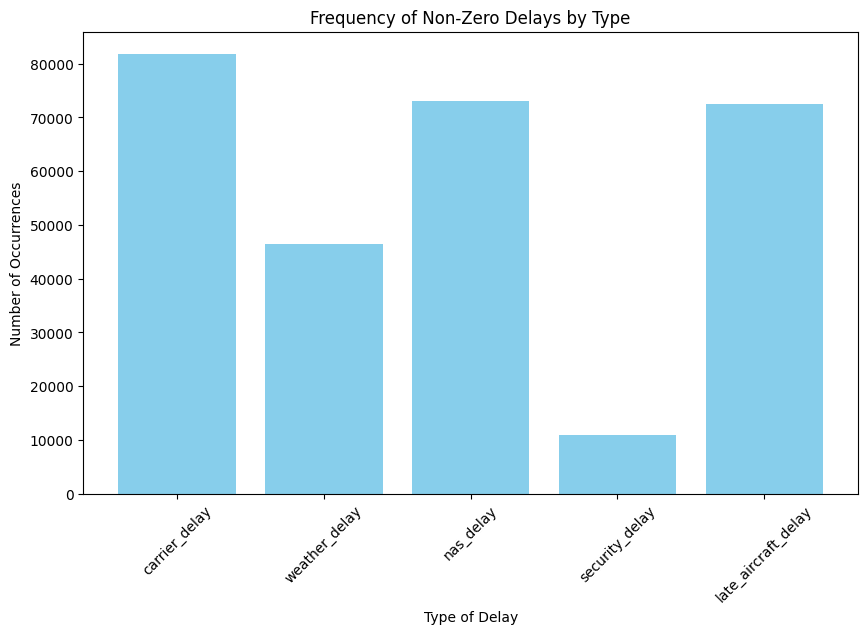

In [33]:
# Calculating the frequency of non-zero delays for each type
delay_frequencies = {delay_type: (data[delay_type] > 0).sum() for delay_type in delay_types}

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.bar(delay_frequencies.keys(), delay_frequencies.values(), color='skyblue')
plt.title('Frequency of Non-Zero Delays by Type')
plt.xlabel('Type of Delay')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


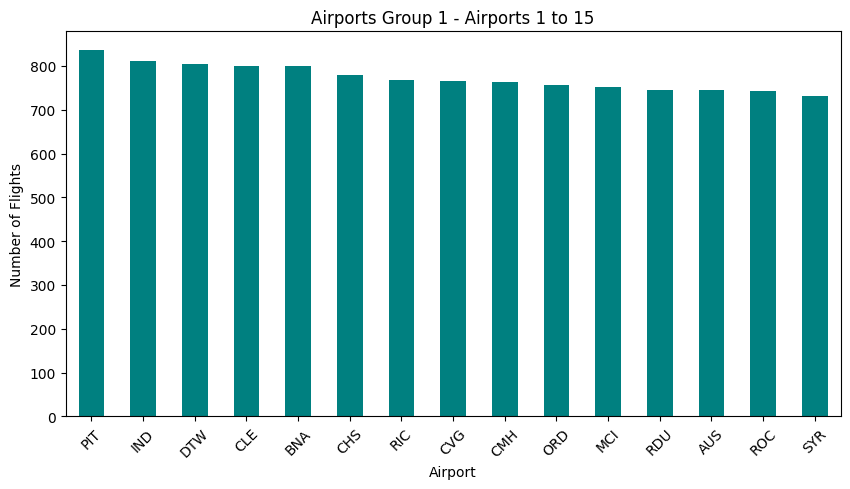

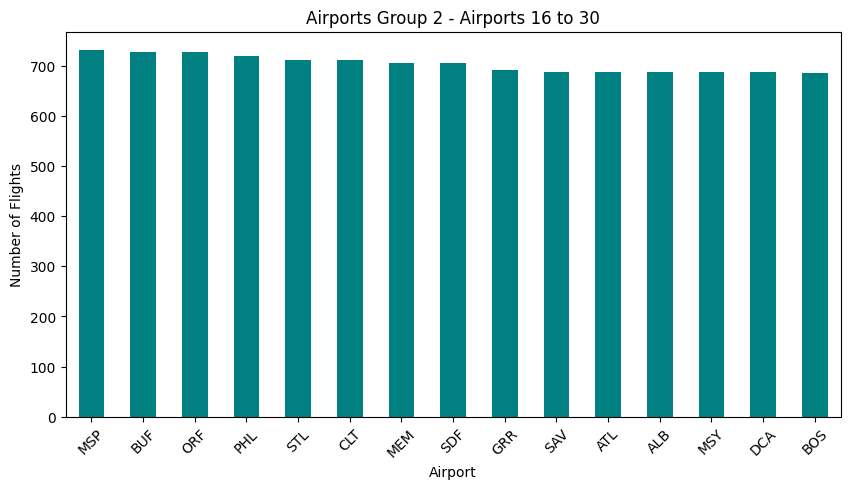

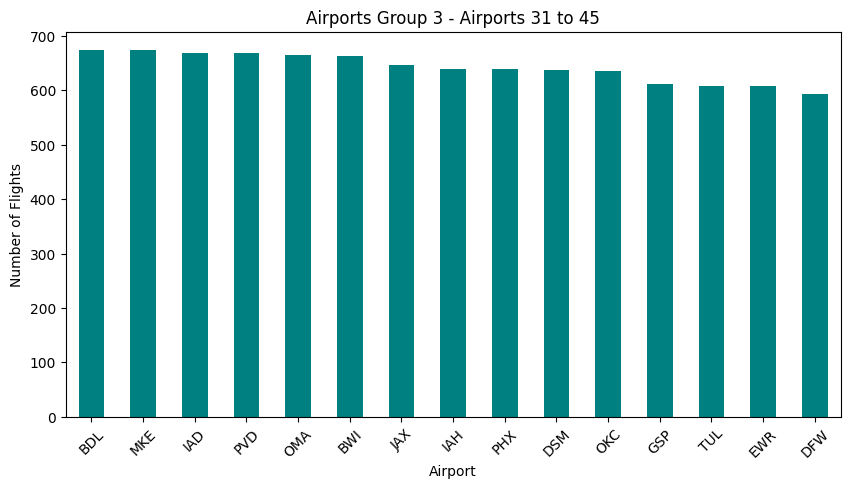

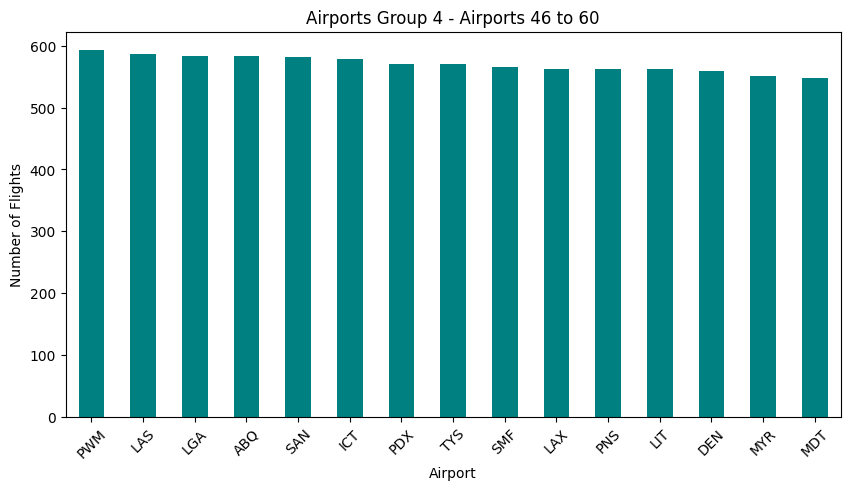

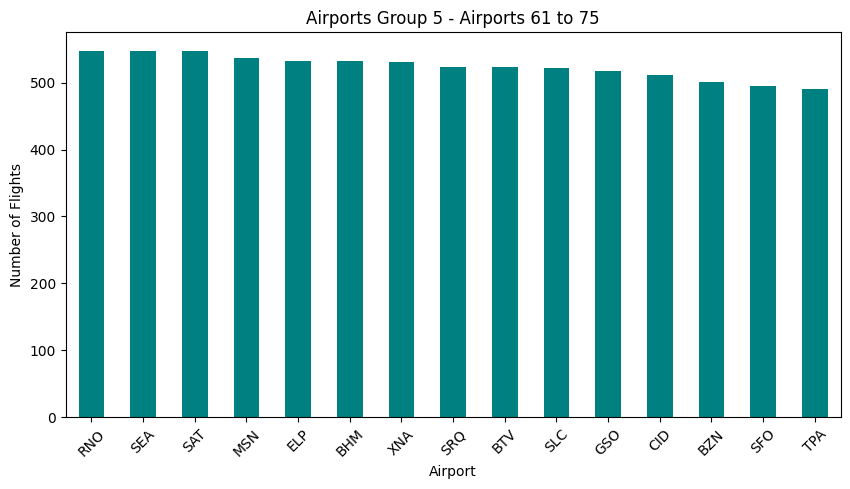

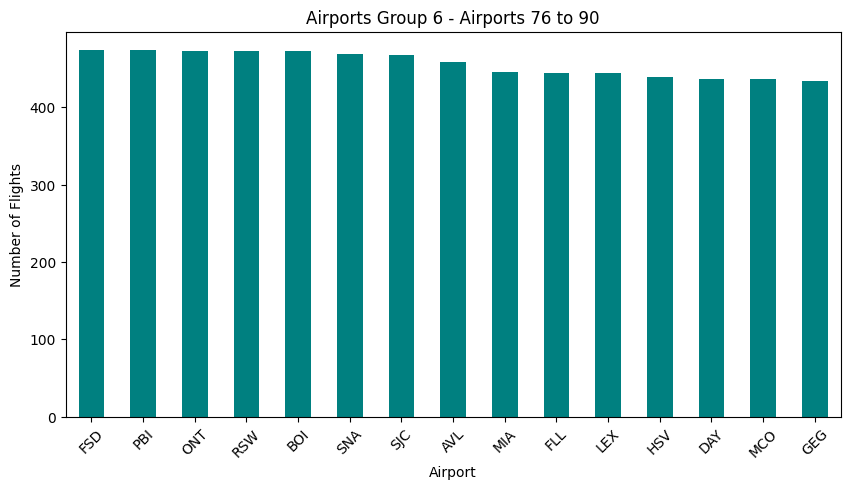

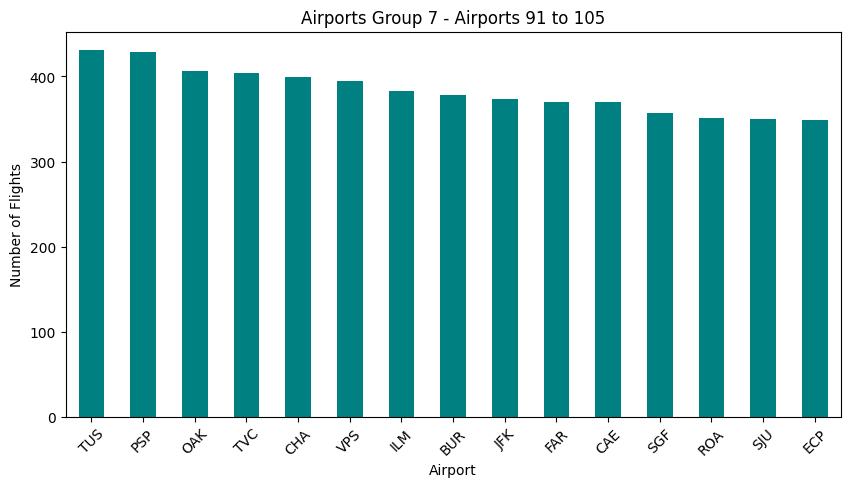

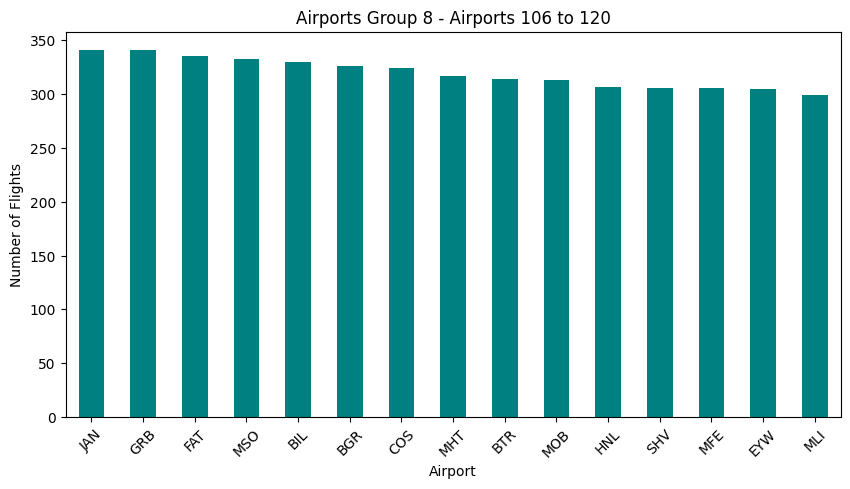

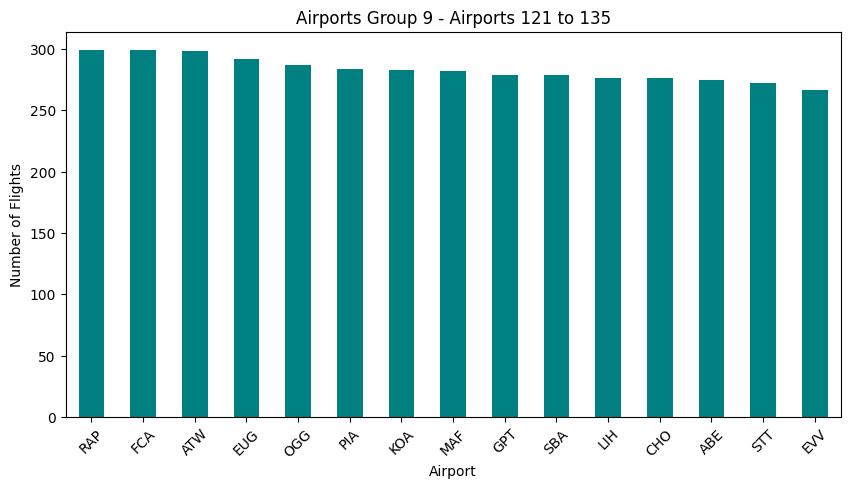

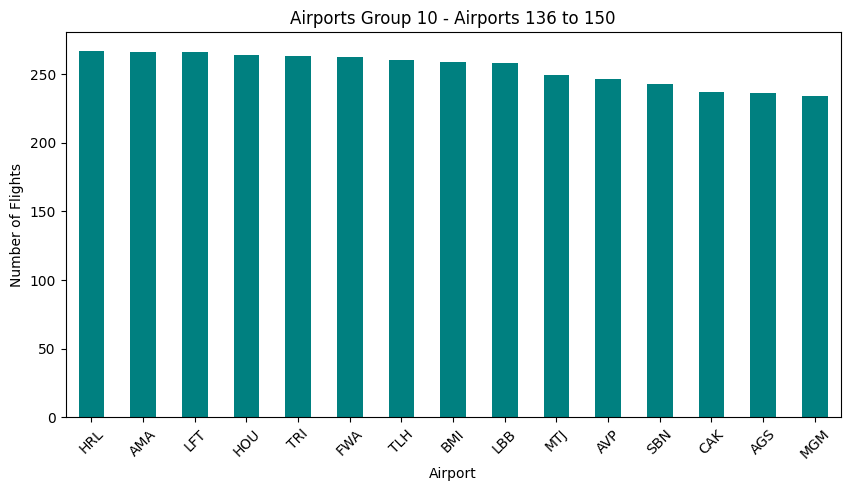

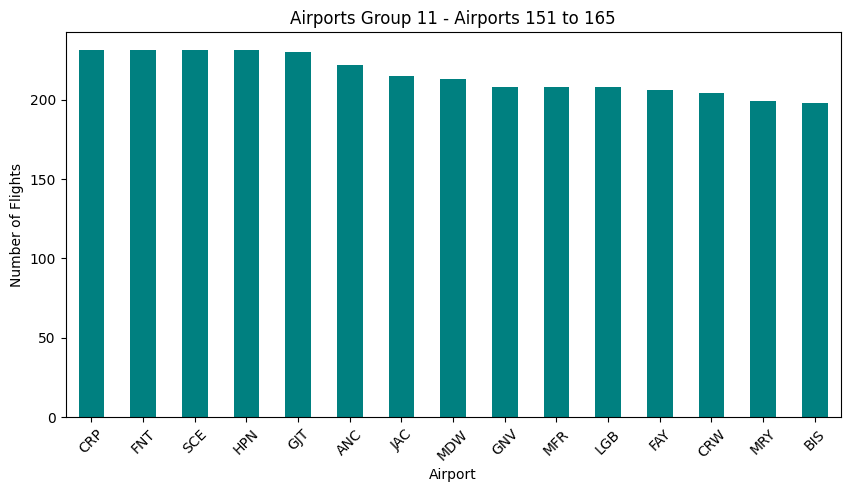

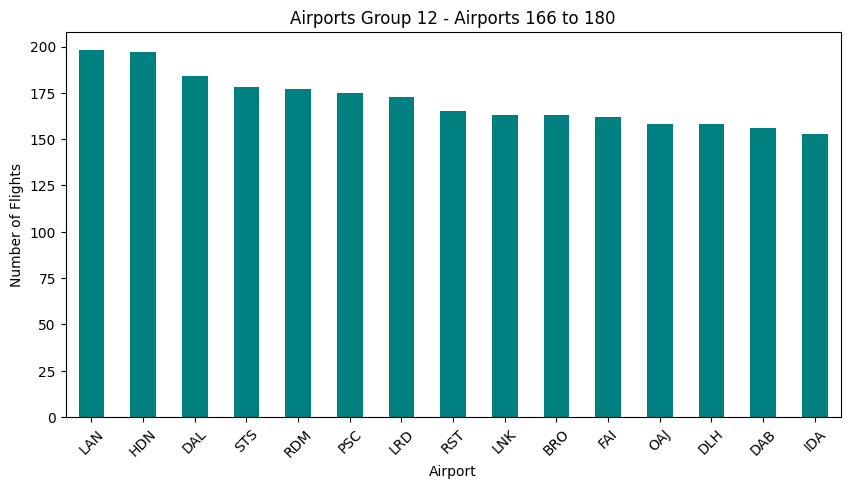

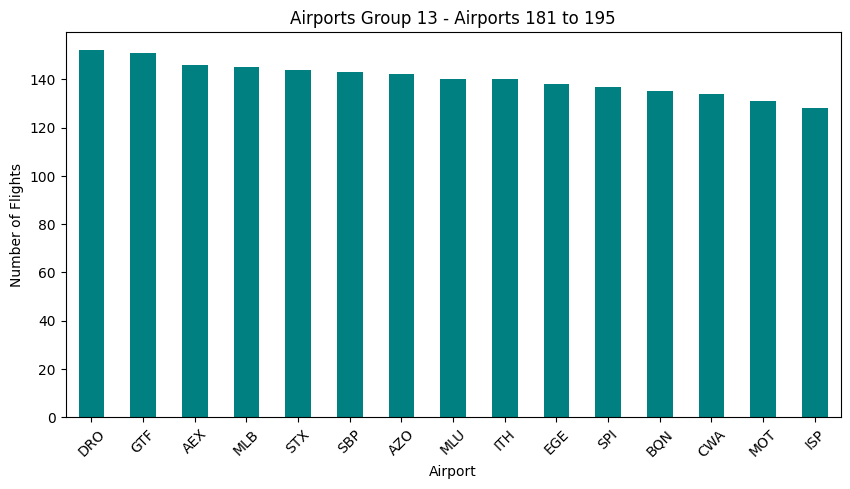

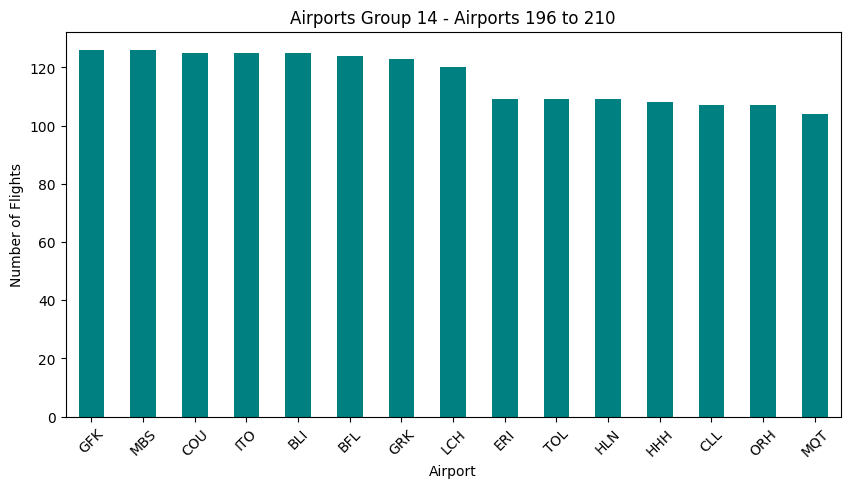

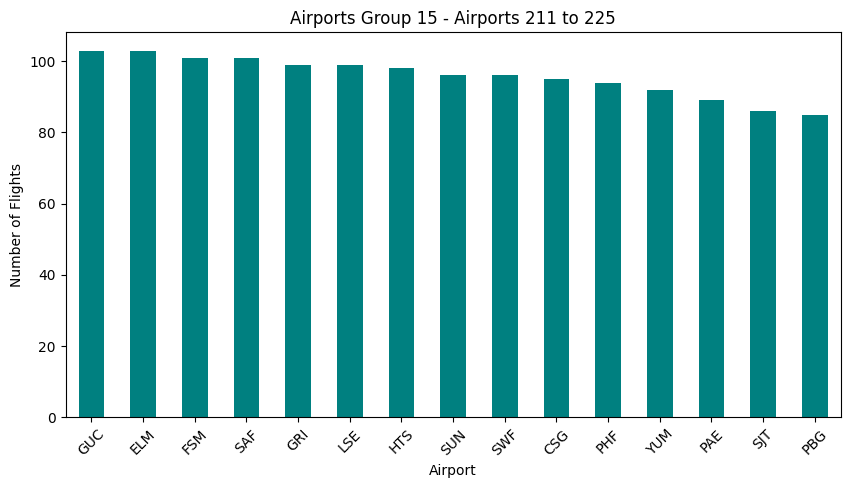

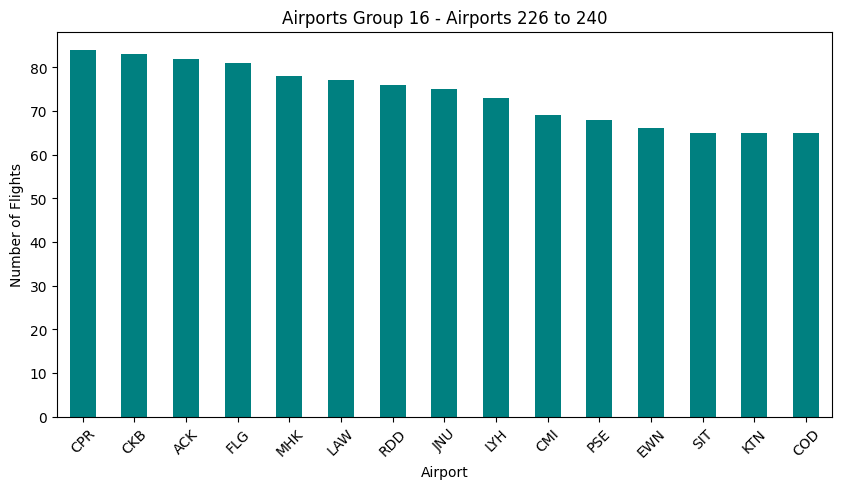

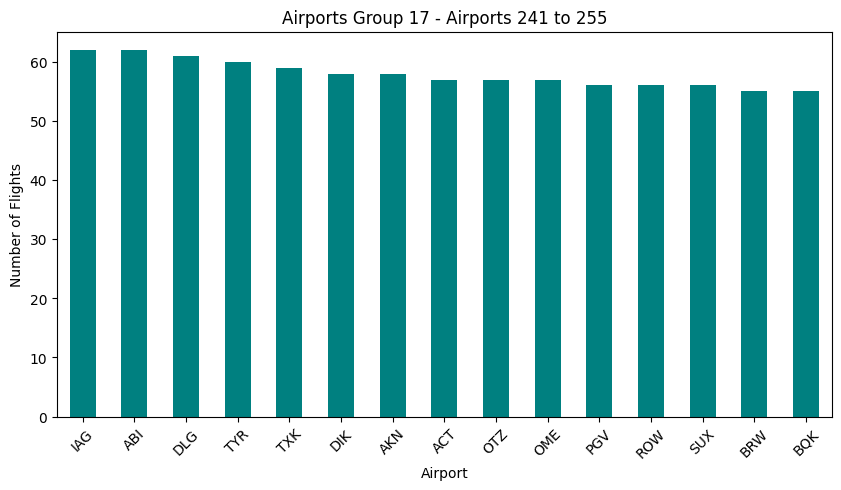

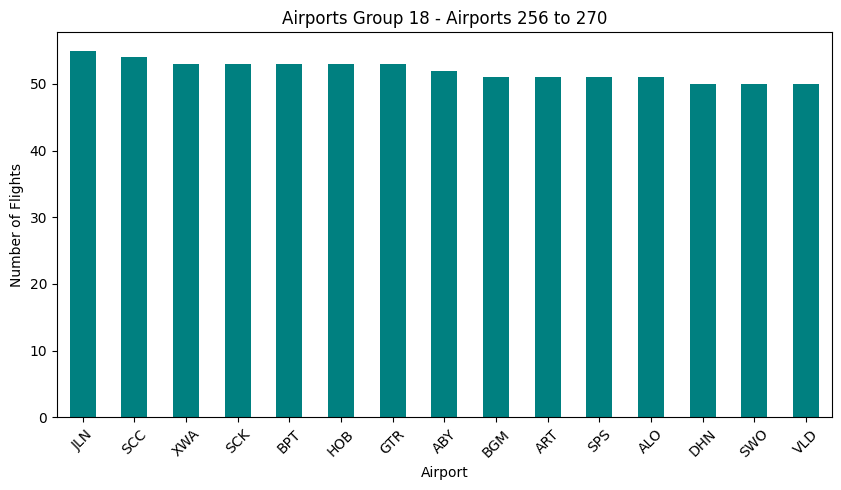

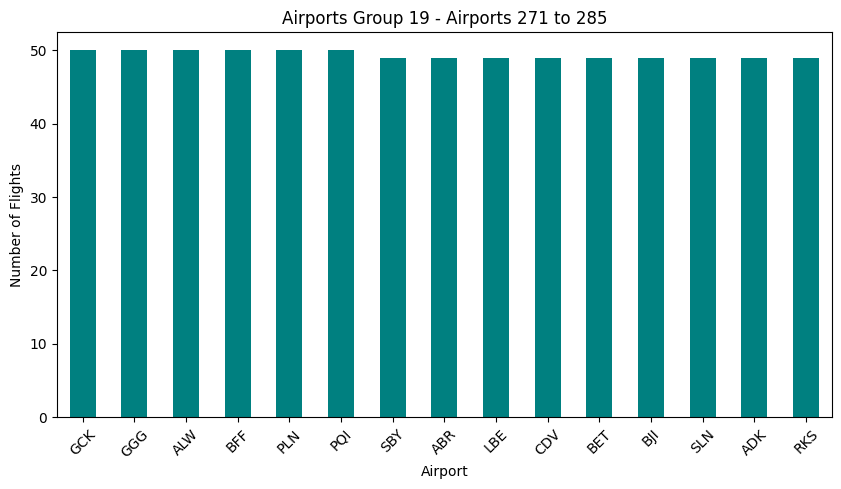

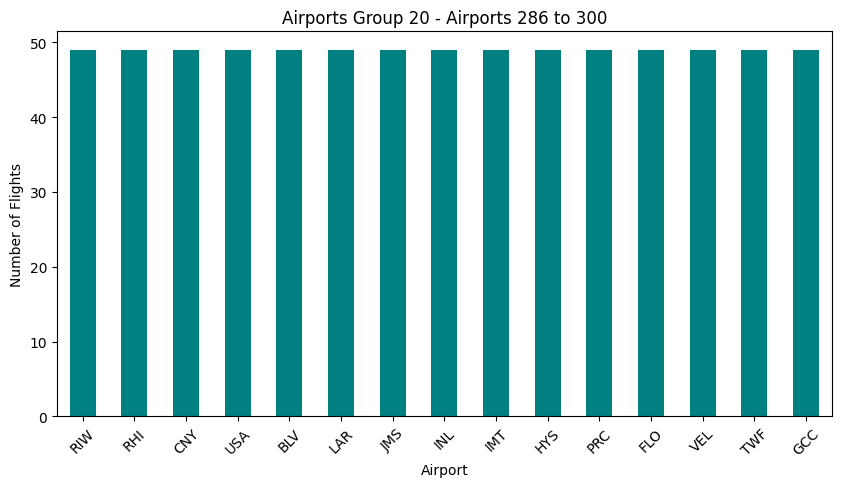

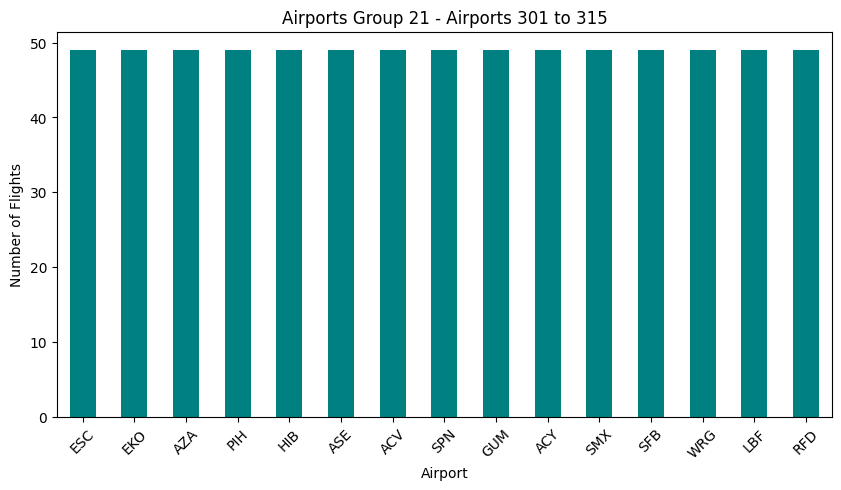

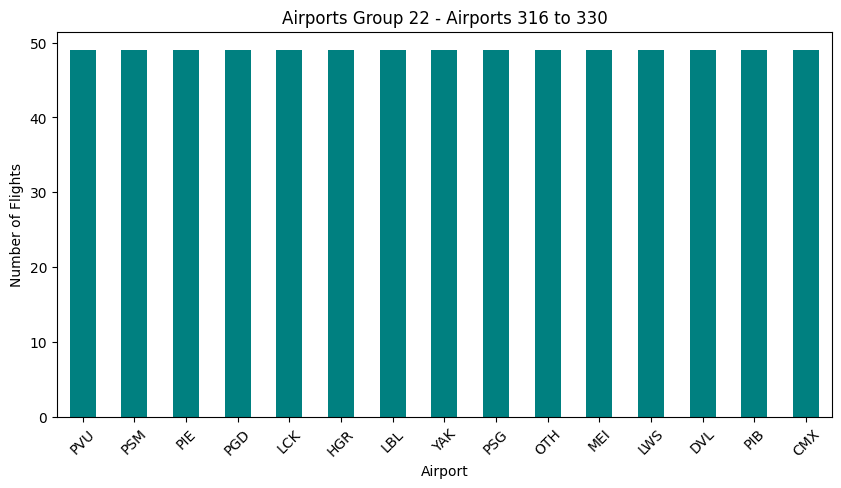

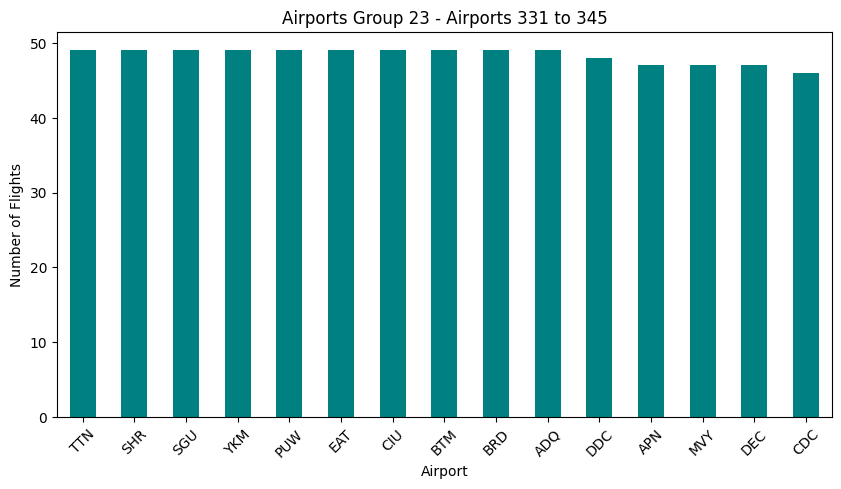

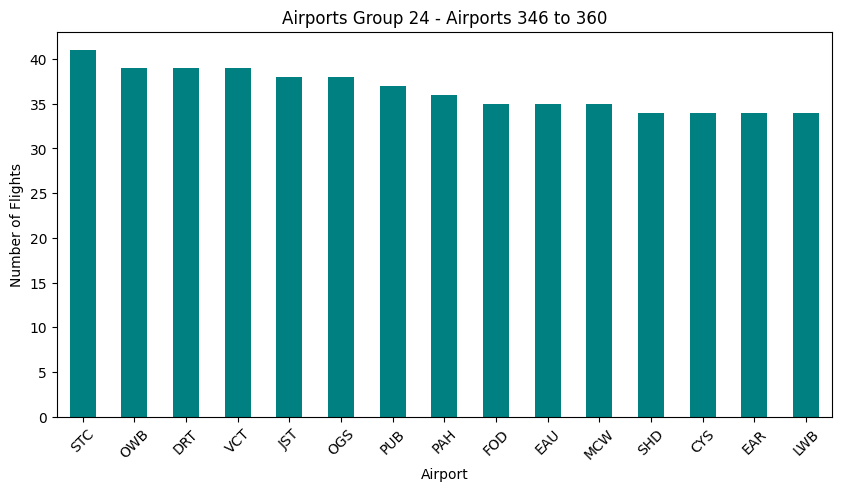

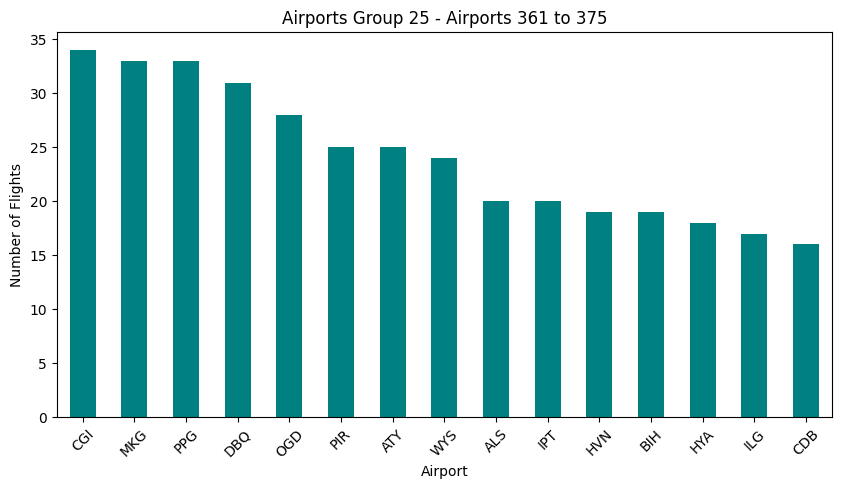

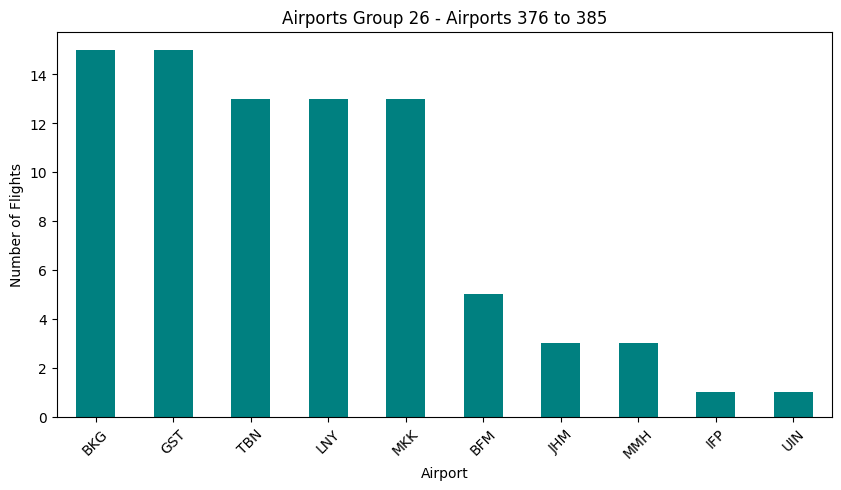

In [34]:
import matplotlib.pyplot as plt

# Calculate the frequency of flights for each airport
airport_frequencies = data['airport'].value_counts().sort_values(ascending=False)

# Total number of groups
num_airports = len(airport_frequencies)
groups = (num_airports + 14) // 15  # This ensures we capture all airports even if the total number isn't a multiple of 15

# Plotting each group
for i in range(groups):
    start_idx = i * 15
    end_idx = start_idx + 15
    subset = airport_frequencies[start_idx:end_idx]

    plt.figure(figsize=(10, 5))
    subset.plot(kind='bar', color='teal')
    plt.title(f'Airports Group {i+1} - Airports {start_idx+1} to {min(end_idx, num_airports)}')
    plt.xlabel('Airport')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.show()


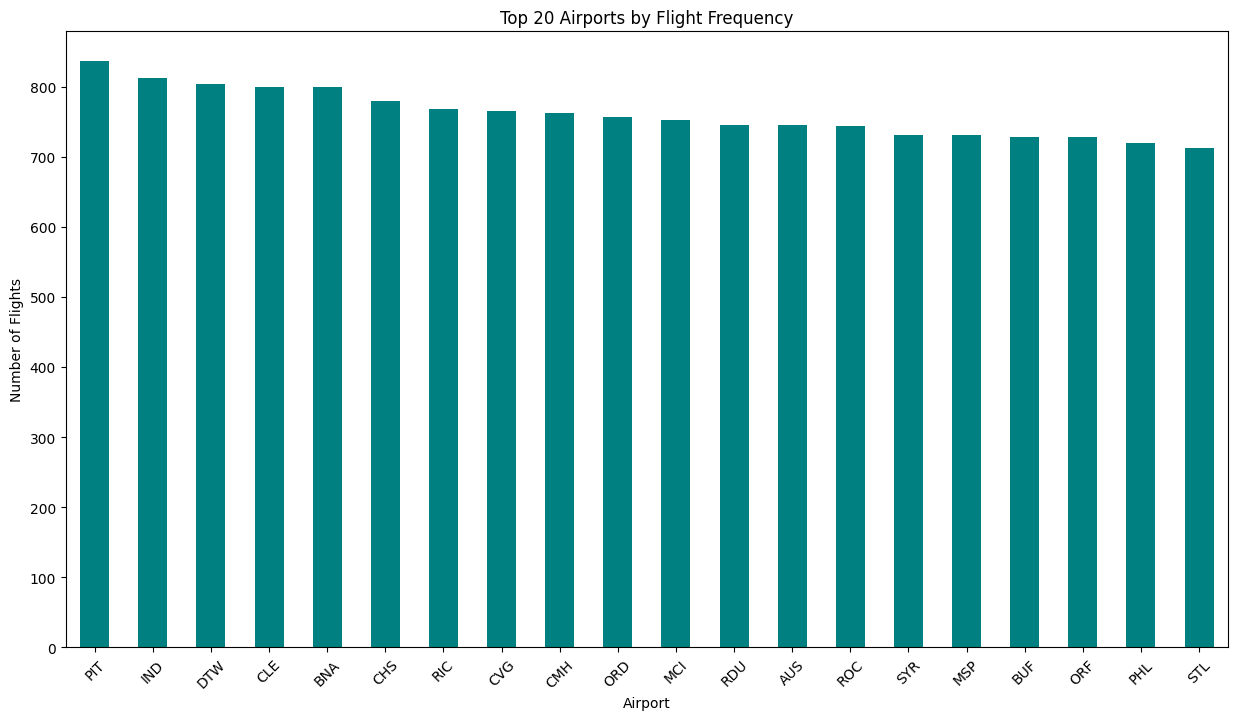

In [35]:
# Plotting the top 20 airports for better visibility
top_airports = airport_frequencies.head(20)  # Adjust the number here as needed
plt.figure(figsize=(15, 8))
top_airports.plot(kind='bar', color='teal')
plt.title('Top 20 Airports by Flight Frequency')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate the labels for better visibility
plt.show()


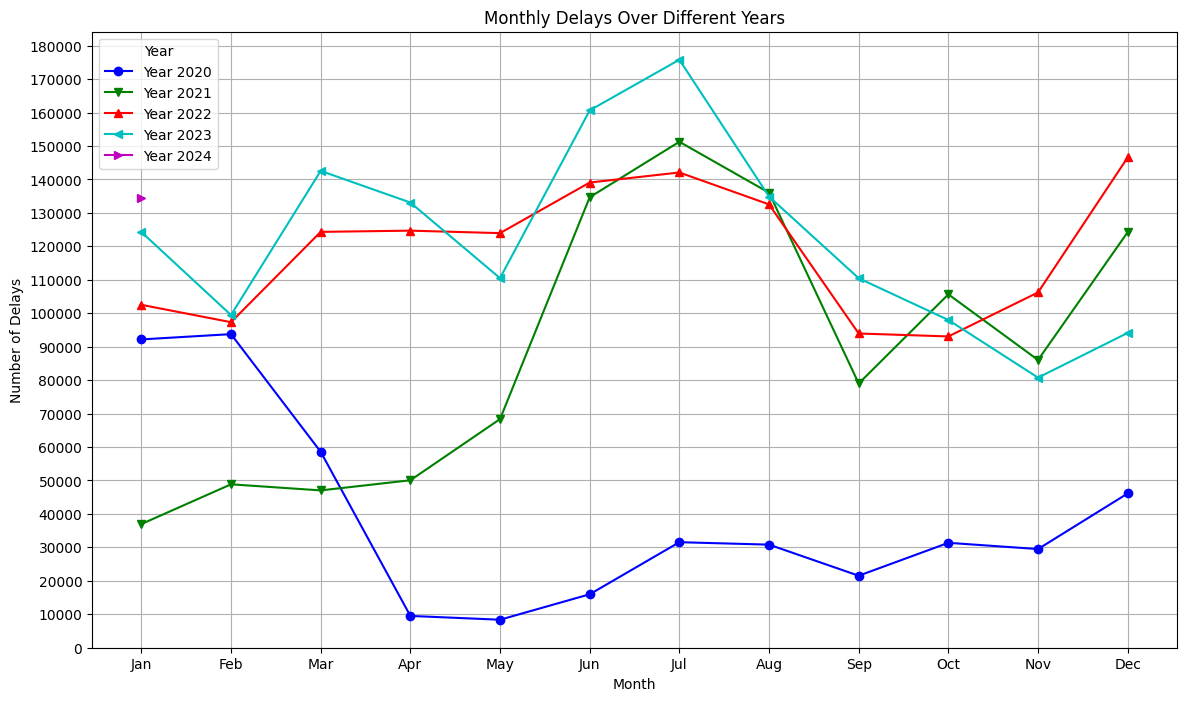

In [36]:
import matplotlib.pyplot as plt

# Creating a 'year_month' identifier for easier grouping
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Sum delays by 'year_month'
monthly_yearly_delays = data.groupby('year_month')['arr_del15'].sum().reset_index()

# Extract year and month for plotting
monthly_yearly_delays['year'] = monthly_yearly_delays['year_month'].apply(lambda x: x.split('-')[0])
monthly_yearly_delays['month'] = monthly_yearly_delays['year_month'].apply(lambda x: int(x.split('-')[1]))

# Sorting by year and month to make sure data is in order
monthly_yearly_delays.sort_values(by=['year', 'month'], inplace=True)

# Plotting setup
plt.figure(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend this list if you have more than 7 years
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'h', 'H', 'D', 'd']  # Different markers for each year

# Group by year and then plot each group
for (key, grp), color, marker in zip(monthly_yearly_delays.groupby('year'), colors, markers):
    plt.plot(grp['month'], grp['arr_del15'], label=f'Year {key}', marker=marker, color=color)

plt.title('Monthly Delays Over Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(0, int(max(monthly_yearly_delays['arr_del15']) + 10000), 10000))  # Ensure y-axis values are integers
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [37]:
# Assuming 'arr_del15' is 1 when there's a delay and 0 when there's no delay
# Count the number of on-time flights
on_time_flights = data[data['arr_del15'] == 0].shape[0]

# Print the result
print(f"Total number of on-time flights: {on_time_flights}")


Total number of on-time flights: 5672


In [38]:
# Calculate the total number of flights that were delayed
total_delayed_flights = data['arr_del15'].sum()

# Print the total number of delayed flights
print(f"Total number of delayed flights: {int(total_delayed_flights)}")


Total number of delayed flights: 4562433


In [39]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Define the delay columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Initialize a dictionary to store the results
delays_by_range = {}

# Define ranges
ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60)]

# Loop through each range
for start, end in ranges:
    # Flights delayed within the range, including end point, not double counting
    condition = (data[delay_columns] > start-1) & (data[delay_columns] <= end)
    data['is_delayed'] = condition.any(axis=1)
    total_delayed_flights = data['is_delayed'].sum()
    delays_by_range[f"{start}-{end} minutes"] = total_delayed_flights

# Print the result
print(delays_by_range)


{'1-10 minutes': 10103, '11-20 minutes': 13009, '21-30 minutes': 11996, '31-40 minutes': 10550, '41-50 minutes': 9149, '51-60 minutes': 8537}


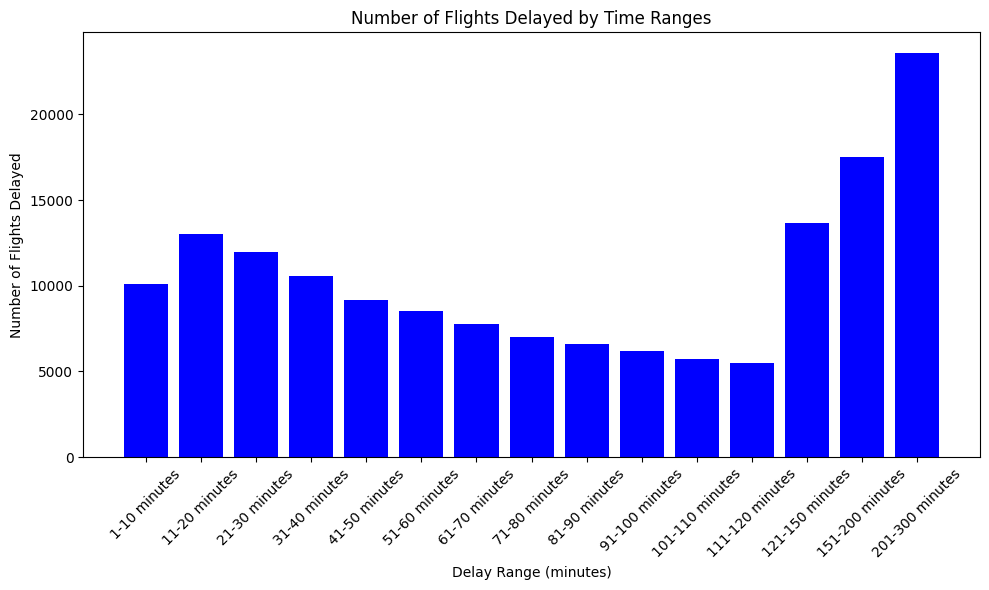

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Define the delay columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Initialize a dictionary to store the results
delays_by_range = {}

# Define ranges
ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60),(61, 70), (71, 80), (81, 90), (91, 100), (101, 110), (111, 120),(121, 150),(151, 200),(201, 300)]

# Loop through each range
for start, end in ranges:
    # Flights delayed within the range, including end point, not double counting
    condition = (data[delay_columns] > start-1) & (data[delay_columns] <= end)
    data['is_delayed'] = condition.any(axis=1)
    total_delayed_flights = data['is_delayed'].sum()
    delays_by_range[f"{start}-{end} minutes"] = total_delayed_flights

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(delays_by_range.keys(), delays_by_range.values(), color='blue')  # Create a bar chart
plt.xlabel('Delay Range (minutes)')  # Label the x-axis
plt.ylabel('Number of Flights Delayed')  # Label the y-axis
plt.title('Number of Flights Delayed by Time Ranges')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.show()  # Display the plot


In [41]:
# Example calculations for each type of delay
air_carrier_delay = (data['carrier_delay'] > 0).sum()
weather_delay = (data['weather_delay'] > 0).sum()
nas_delay = (data['nas_delay'] > 0).sum()
security_delay = (data['security_delay'] > 0).sum()
aircraft_arriving_late = (data['late_aircraft_delay'] > 0).sum()


In [42]:
# Assume 'airport_code' is the column name that contains the airport identifiers
total_airports = data['airport'].nunique()

# Print the total number of unique airports
print("Total number of unique airports:", total_airports)


Total number of unique airports: 385


In [43]:
# Assume 'airport_code' is the column name that contains the airport identifiers
airport_frequencies = data['airport'].value_counts()

# Print the frequencies of each airport
print("Frequency of each airport:")
print(airport_frequencies)


Frequency of each airport:
airport
PIT    837
IND    812
DTW    804
BNA    799
CLE    799
      ... 
BFM      5
JHM      3
MMH      3
IFP      1
UIN      1
Name: count, Length: 385, dtype: int64


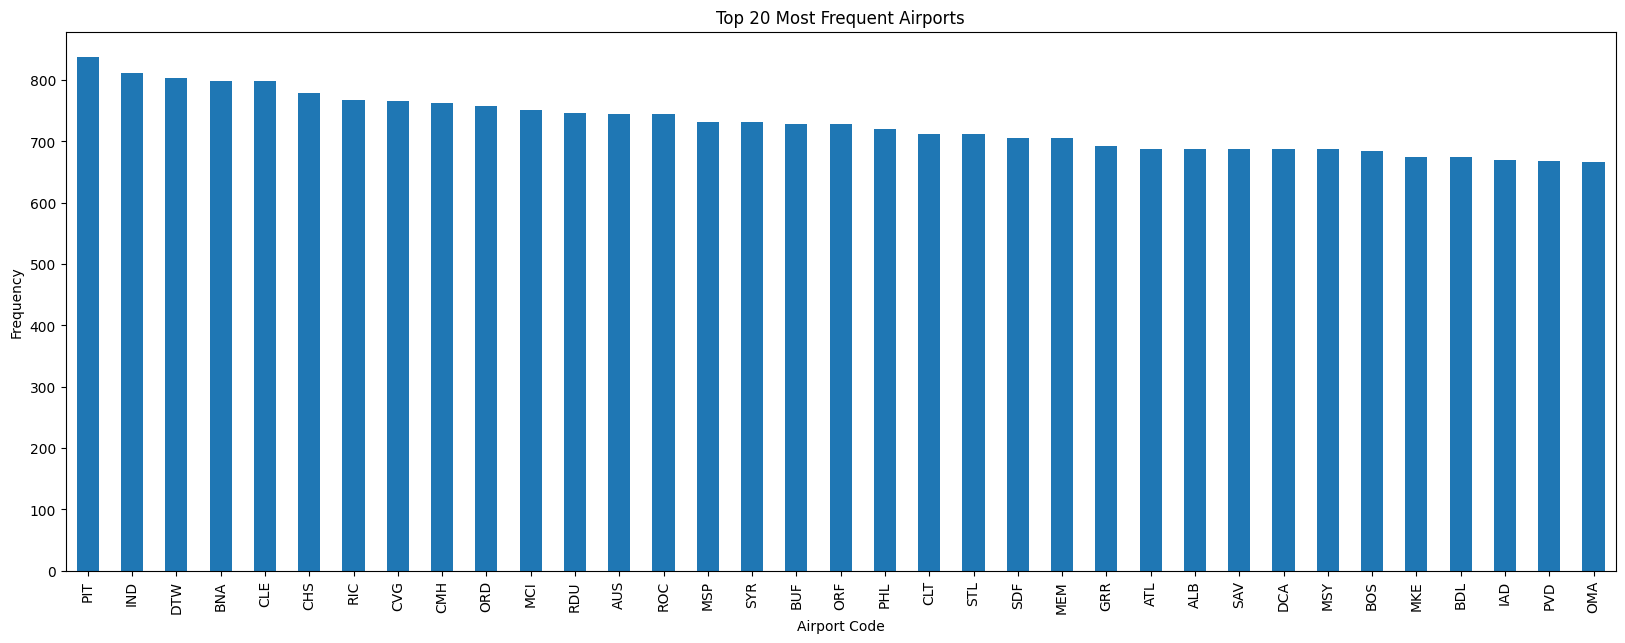

In [44]:
# Plotting the top 20 most frequent airports
airport_frequencies.head(35).plot(kind='bar', figsize=(20, 7))
plt.title('Top 20 Most Frequent Airports')
plt.xlabel('Airport Code')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Assume 'airport_code' is the column name that contains the airport identifiers
airport_frequencies = data['airport_name'].value_counts()

# Print the frequencies of each airport
print("Frequency of each airport:")
print(airport_frequencies)


Frequency of each airport:
airport_name
Pittsburgh, PA: Pittsburgh International              837
Indianapolis, IN: Indianapolis International          812
Detroit, MI: Detroit Metro Wayne County               804
Cleveland, OH: Cleveland-Hopkins International        799
Nashville, TN: Nashville International                799
                                                     ... 
Mobile, AL: Mobile Downtown                             5
Mammoth Lakes, CA: Mammoth Lakes Airport                3
Kapalua, HI: Kapalua Airport                            3
Bullhead City, AZ: Laughlin/Bullhead International      1
Quincy, IL: Quincy Regional-Baldwin Field               1
Name: count, Length: 408, dtype: int64


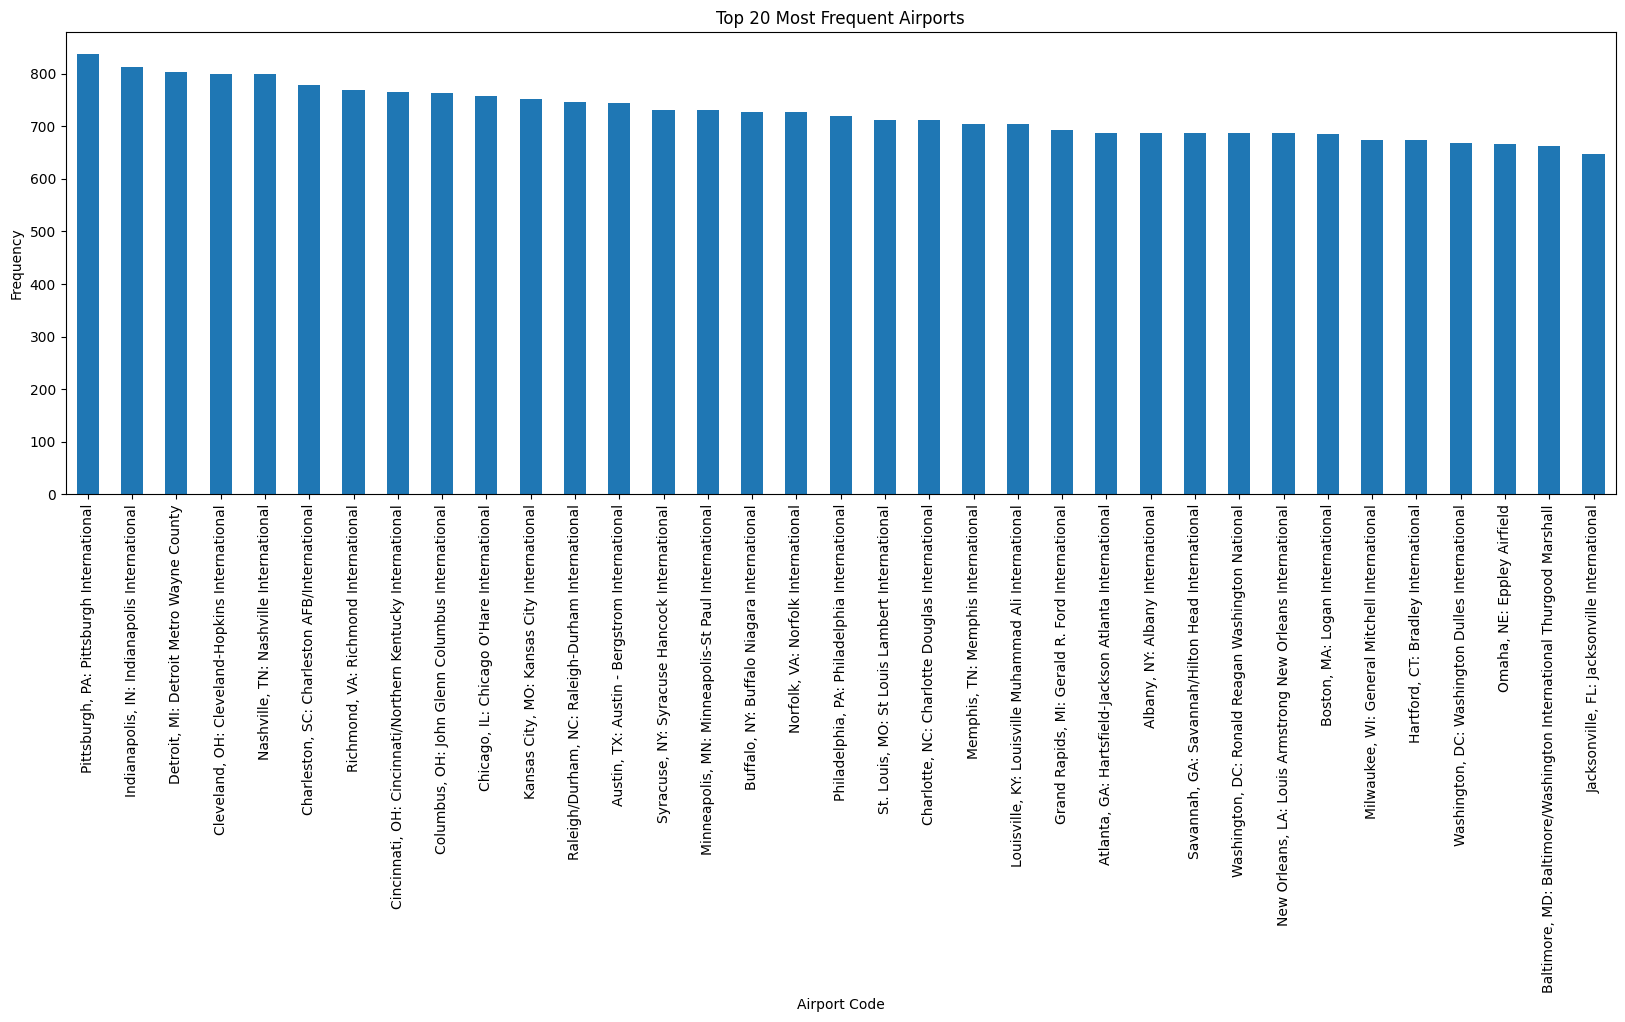

In [46]:
import matplotlib.pyplot as plt
# Plotting the top 20 most frequent airports
airport_frequencies.head(35).plot(kind='bar', figsize=(20, 6))
plt.title('Top 20 Most Frequent Airports')
plt.xlabel('Airport Code')
plt.ylabel('Frequency')
plt.show()


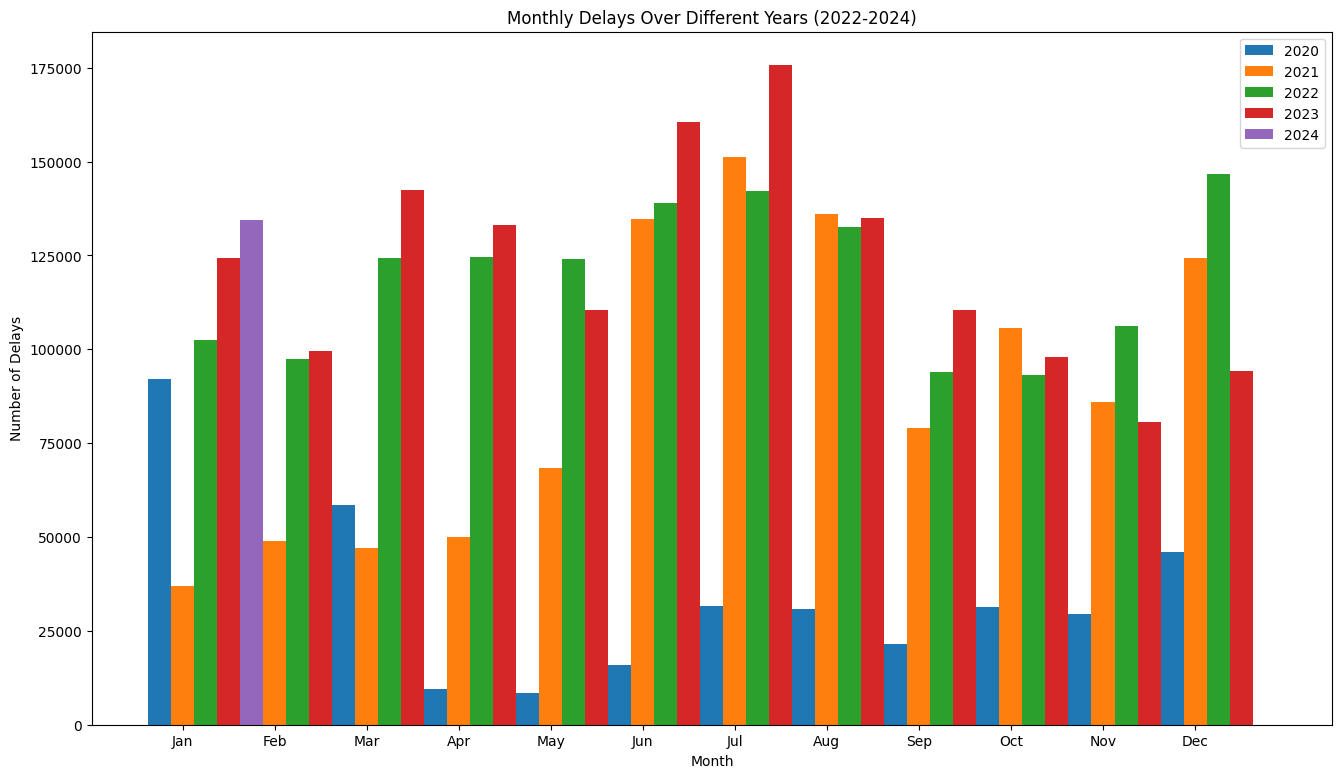

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Unique months for labeling the x-axis correctly
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bar_width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
index = np.arange(len(months_labels))  # Index for the months

# Data handling and plotting for each year
for i, year in enumerate(['2020','2021','2022', '2023', '2024']):
    # Filter data for each year and fill missing months with zeros for consistent plotting
    yearly_data = monthly_yearly_delays[monthly_yearly_delays['year'] == year]
    monthly_data = np.zeros(12)  # Assume 12 months, fill with zeros
    for month in yearly_data['month'].astype(int):
        monthly_data[month-1] = yearly_data[yearly_data['month'].astype(int) == month]['arr_del15'].values[0]

    ax.bar(index + bar_width * i, monthly_data, bar_width, label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Delays')
ax.set_title('Monthly Delays Over Different Years (2022-2024)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(months_labels)
ax.legend()

plt.show()




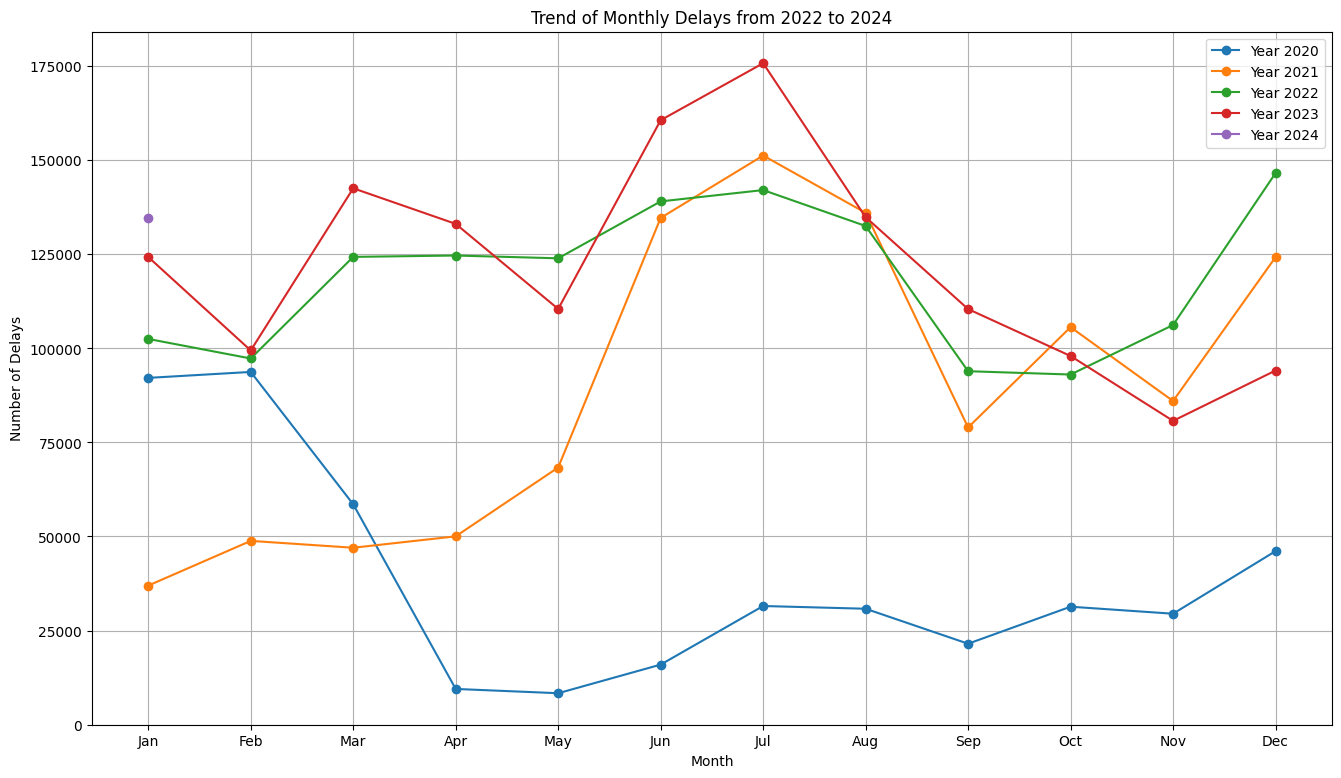

In [48]:
fig, ax = plt.subplots(figsize=(16, 9))

# Plot data correctly handling each year
for key, grp in monthly_yearly_delays.groupby('year'):
    # Prepare a full year of data to plot (set missing months to NaN or zero)
    full_year_data = np.full(12, np.nan)  # Start with NaN for missing months
    for month in grp['month'].astype(int):
        full_year_data[month-1] = grp[grp['month'].astype(int) == month]['arr_del15'].values[0]

    ax.plot(months_labels, full_year_data, marker='o', label=f'Year {key}')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Delays')
ax.set_title('Trend of Monthly Delays from 2022 to 2024')
ax.legend()
plt.grid(True)
plt.show()


<ipython-input-49-850265941b9d>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(pivot_table.columns.astype(str)))
<ipython-input-49-850265941b9d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(pivot_table.index.astype(str)))


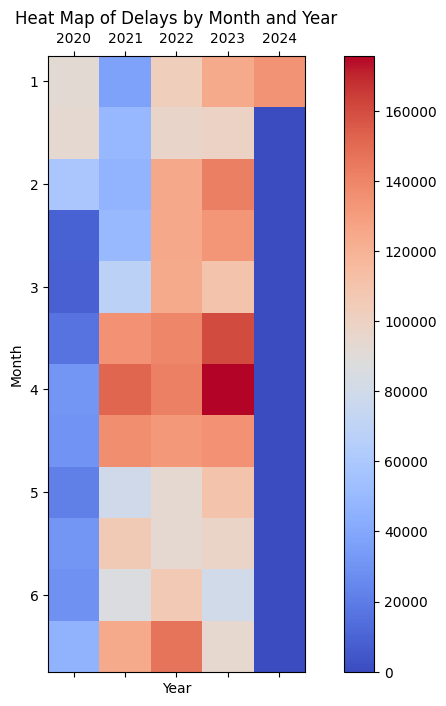

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data (make sure it's loaded correctly)
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Assuming 'data' has 'year' and 'month' as separate integer columns and 'arr_del15'
# If they're not, you'll need to correct how they're handled based on your actual data structure.

# Pivot data to create a heatmap data format
pivot_table = data.pivot_table(values='arr_del15', index='month', columns='year', aggfunc='sum', fill_value=0)

# Plotting the heat map
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(pivot_table, interpolation='nearest', cmap='coolwarm')
fig.colorbar(cax)

# Setting tick labels
ax.set_xticklabels([''] + list(pivot_table.columns.astype(str)))
ax.set_yticklabels([''] + list(pivot_table.index.astype(str)))

ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Heat Map of Delays by Month and Year')
plt.show()


In [50]:
# Create the binary target variable
data['delayed'] = (data['arr_delay'] >= 15).astype(int)

# Drop irrelevant columns
columns_to_drop = ['carrier_name', 'airport_name']
data_cleaned = data.drop(columns=columns_to_drop)

# Encode categorical variables
categorical_cols = ['carrier', 'airport']
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split

train_val, test_data = train_test_split(data_cleaned, test_size=0.10, random_state=42)
train_data, val_data = train_test_split(train_val, test_size=0.22, random_state=42)  # 0.22 * 0.90 ≈ 0.20

(train_data.shape, val_data.shape, test_data.shape)


((64694, 426), (18248, 426), (9216, 426))

<Figure size 1000x800 with 0 Axes>

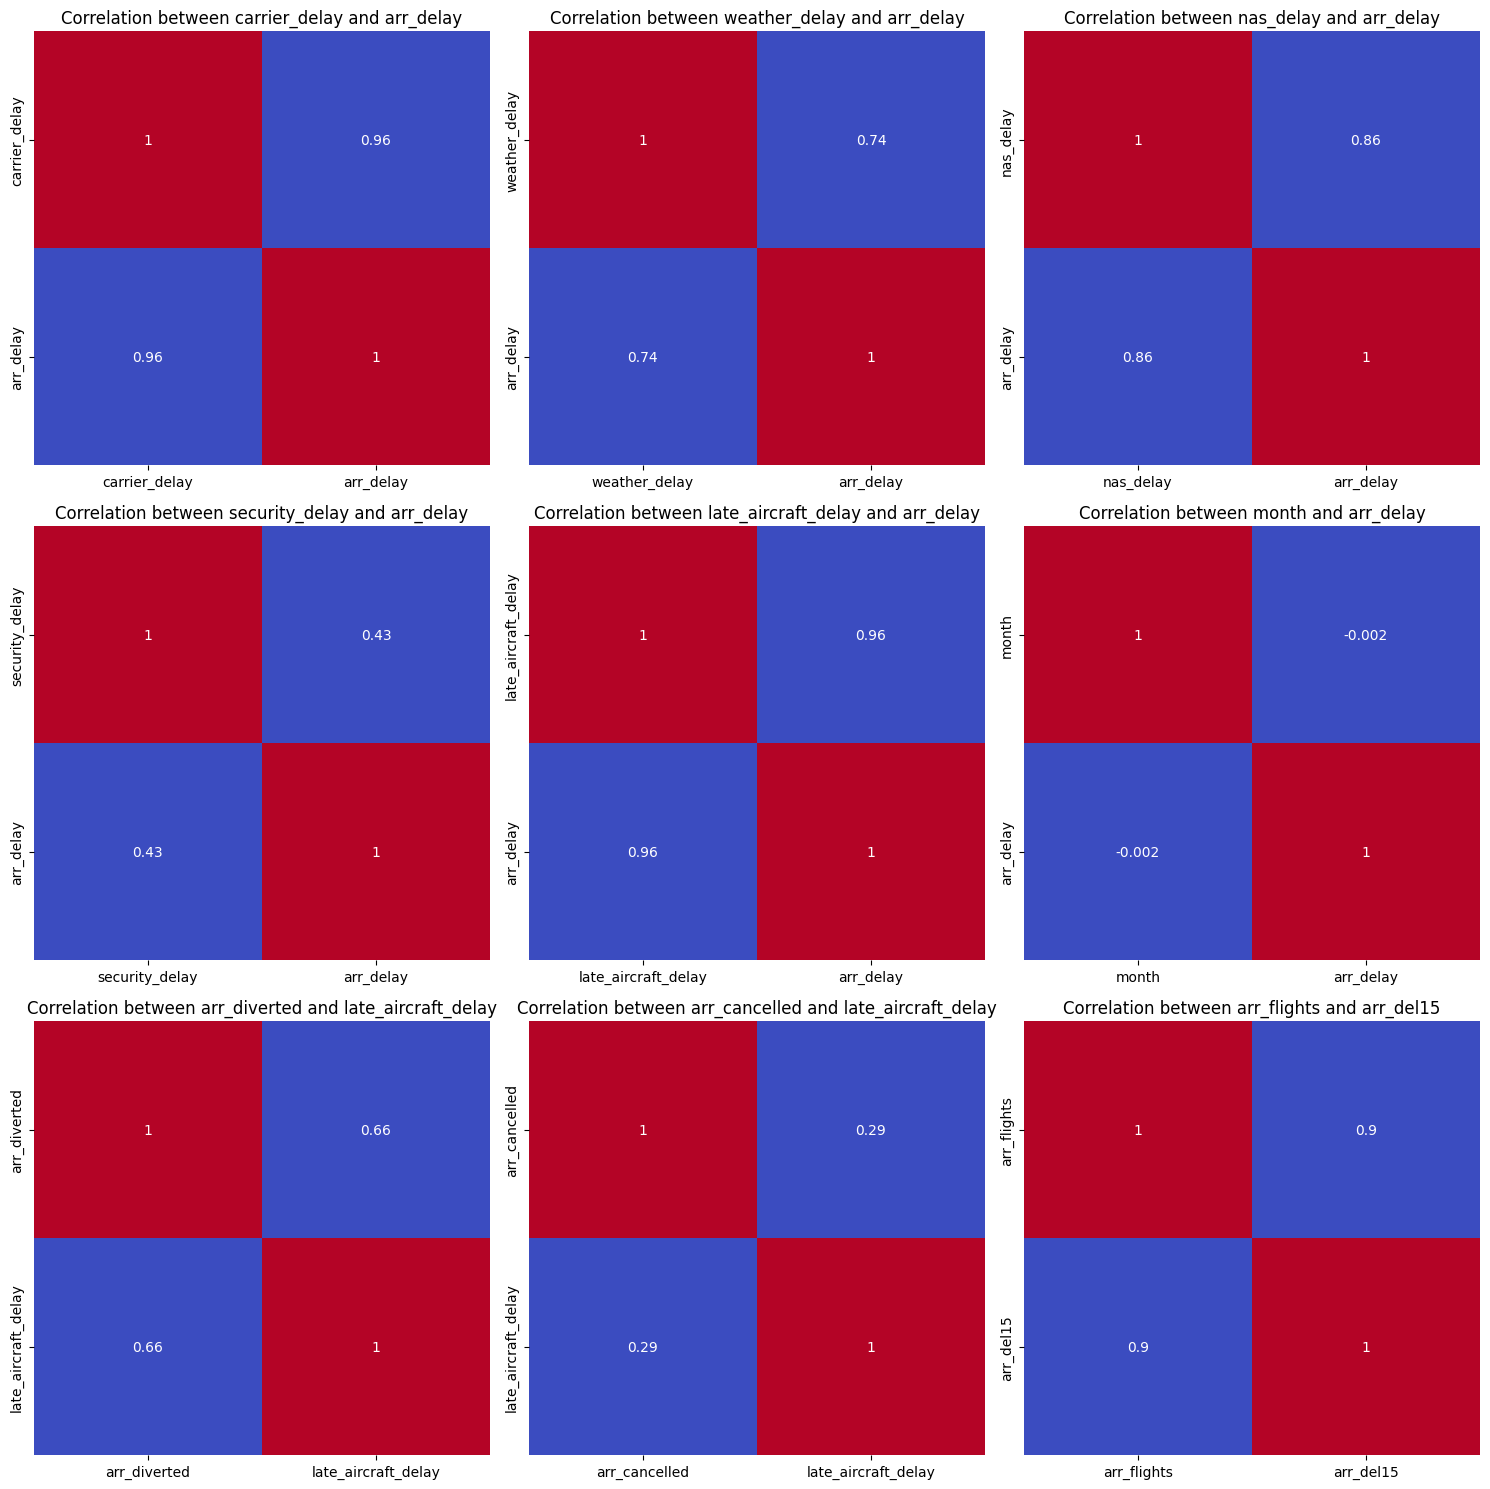

In [51]:
# Set up matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger figure size for better visibility
plt.figure(figsize=(10, 8))

# Define a list of pairs of columns for which to plot correlation heatmaps
correlation_pairs = [
    ('carrier_delay', 'arr_delay'),
    ('weather_delay', 'arr_delay'),
    ('nas_delay', 'arr_delay'),
    ('security_delay', 'arr_delay'),
    ('late_aircraft_delay', 'arr_delay'),
    ('month', 'arr_delay'),
    ('arr_diverted', 'late_aircraft_delay'),
    ('arr_cancelled', 'late_aircraft_delay'),
    ('arr_flights', 'arr_del15')
]

# Plot each correlation as a separate subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, (x, y) in enumerate(correlation_pairs):
    # Compute the correlation matrix for the pair
    corr_matrix = data[[x, y]].corr()
    ax = axes[i // 3, i % 3]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False, ax=ax)
    ax.set_title(f'Correlation between {x} and {y}')

plt.tight_layout()
plt.show()



In [52]:
# Calculate the number of flights delayed by 15 minutes or more using the 'arr_del15' column
number_of_delays = data['arr_del15'].sum()
number_of_delays


4562433.0

In [53]:
# Calculate the number of flights delayed by 15 minutes or more using the 'arr_del15' column
number_of_delays = data['arr_del15'].sum()
print(f"Number of flights delayed by 15 minutes or more: {number_of_delays}")


Number of flights delayed by 15 minutes or more: 4562433.0


In [54]:
# Update the dataset with the number of on-time flights for each entry
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']

# Optionally, check the entire dataset to confirm the update
print(data[['arr_flights', 'arr_del15', 'on_time_flights']])

# You can also describe the new column to see statistics
print(data['on_time_flights'].describe())




       arr_flights  arr_del15  on_time_flights
0            80.00      16.00            64.00
1             3.00       0.00             3.00
2            62.00       9.00            53.00
3            74.00      15.00            59.00
4           101.00      23.00            78.00
...            ...        ...              ...
92153        48.00      12.00            36.00
92154        69.00      13.00            56.00
92155        58.00       7.00            51.00
92156        32.00       4.00            28.00
92157       102.00      20.00            82.00

[92158 rows x 3 columns]
count   91682.00
mean      236.08
std       699.14
min         0.00
25%        29.00
50%        64.00
75%       153.00
max     19530.00
Name: on_time_flights, dtype: float64


In [55]:
# Save the updated dataset to a new CSV file
data.to_csv('updated_flight_data.csv', index=False)


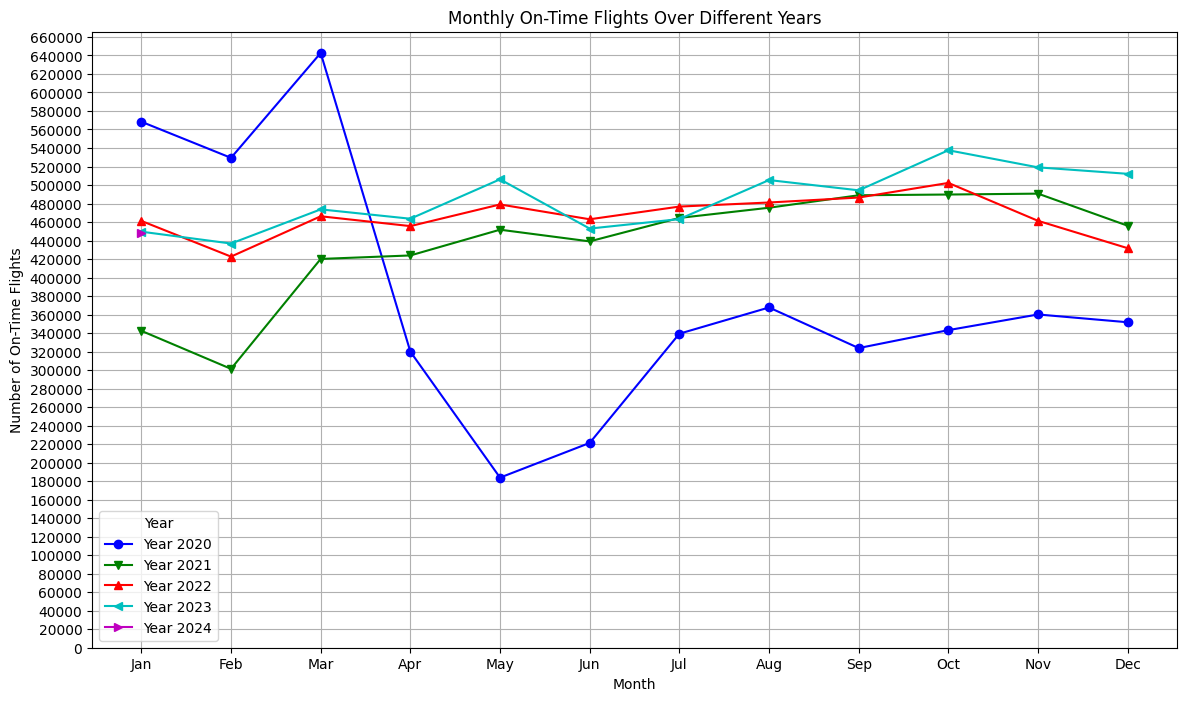

In [56]:
import matplotlib.pyplot as plt

# Ensure 'on_time_flights' is calculated correctly
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']

# Creating a 'year_month' identifier for easier grouping
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Sum on-time flights by 'year_month'
monthly_yearly_on_time = data.groupby('year_month')['on_time_flights'].sum().reset_index()

# Extract year and month for plotting
monthly_yearly_on_time['year'] = monthly_yearly_on_time['year_month'].apply(lambda x: x.split('-')[0])
monthly_yearly_on_time['month'] = monthly_yearly_on_time['year_month'].apply(lambda x: int(x.split('-')[1]))

# Sorting by year and month to make sure data is in order
monthly_yearly_on_time.sort_values(by=['year', 'month'], inplace=True)

# Plotting setup
plt.figure(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend this list if you have more than 7 years
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'h', 'H', 'D', 'd']  # Different markers for each year

# Group by year and then plot each group
for (key, grp), color, marker in zip(monthly_yearly_on_time.groupby('year'), colors, markers):
    plt.plot(grp['month'], grp['on_time_flights'], label=f'Year {key}', marker=marker, color=color)

plt.title('Monthly On-Time Flights Over Different Years')
plt.xlabel('Month')
plt.ylabel('Number of On-Time Flights')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(0, int(max(monthly_yearly_on_time['on_time_flights']) + 20000), 20000))  # Increase y-axis values by 20000 units
plt.legend(title='Year')
plt.grid(True)
plt.show()




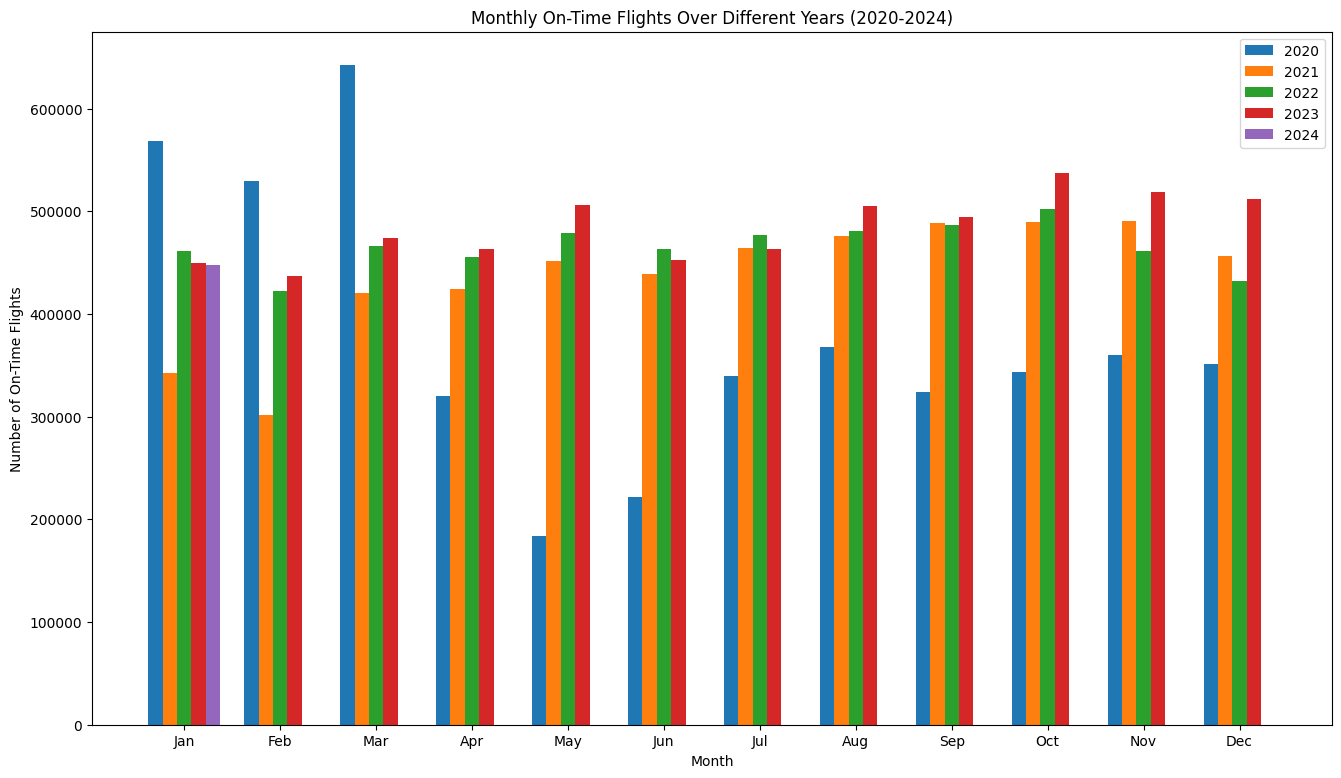

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Unique months for labeling the x-axis correctly
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bar_width = 0.15  # Width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
index = np.arange(len(months_labels))  # Index for the months

# Data handling and plotting for each year
for i, year in enumerate(['2020', '2021', '2022', '2023', '2024']):
    # Filter data for each year and fill missing months with zeros for consistent plotting
    yearly_data = monthly_yearly_on_time[monthly_yearly_on_time['year'] == year]
    monthly_data = np.zeros(12)  # Assume 12 months, fill with zeros
    for month in yearly_data['month'].astype(int):
        monthly_data[month-1] = yearly_data[yearly_data['month'].astype(int) == month]['on_time_flights'].values[0]

    ax.bar(index + bar_width * i, monthly_data, bar_width, label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Number of On-Time Flights')
ax.set_title('Monthly On-Time Flights Over Different Years (2020-2024)')
ax.set_xticks(index + bar_width * 2)  # Adjust tick positions for better alignment
ax.set_xticklabels(months_labels)
ax.legend()

plt.show()


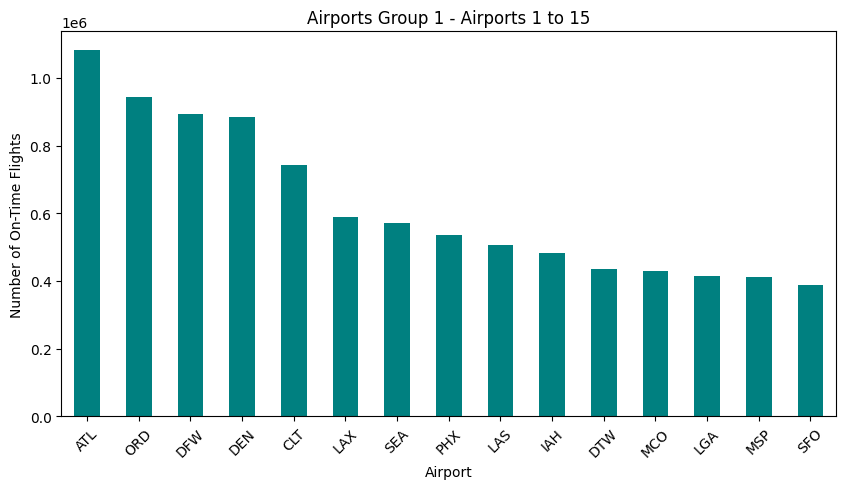

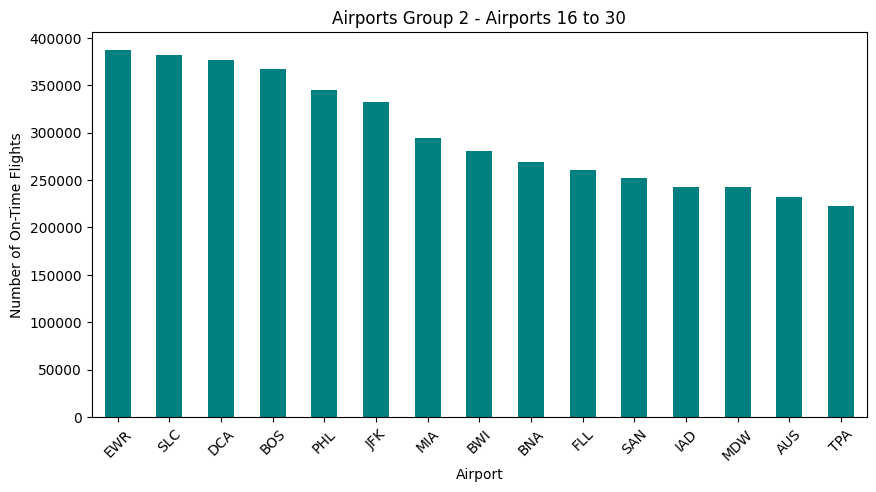

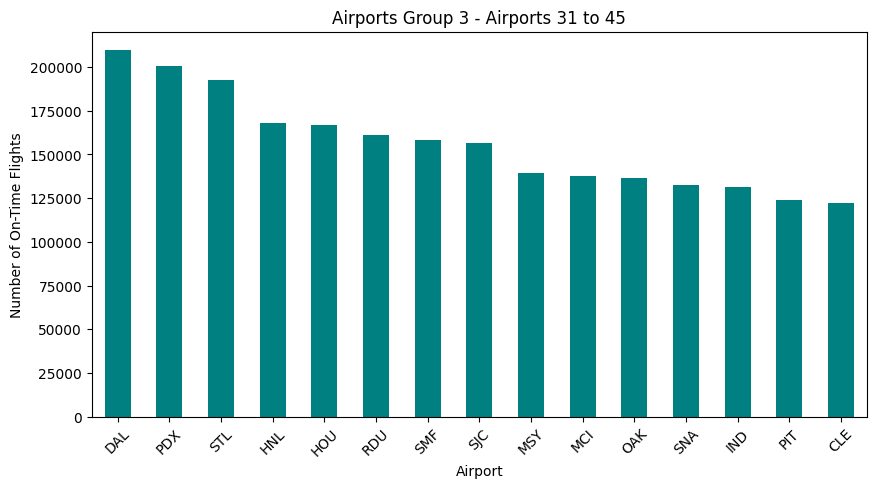

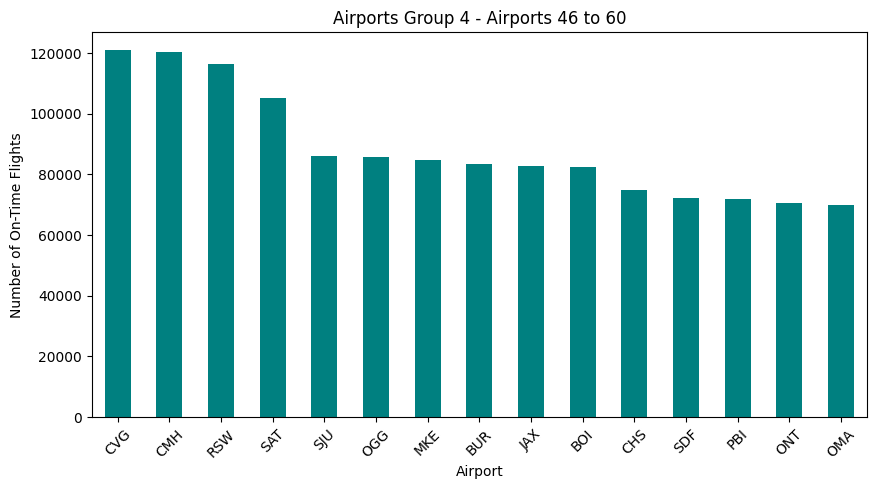

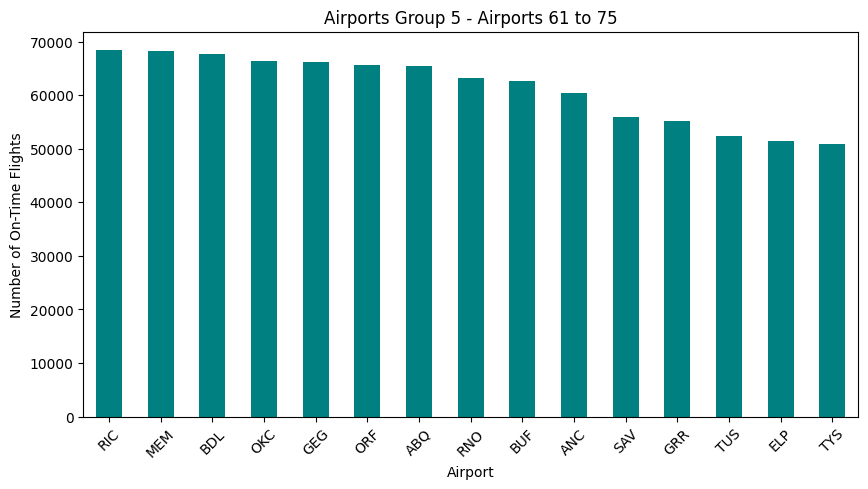

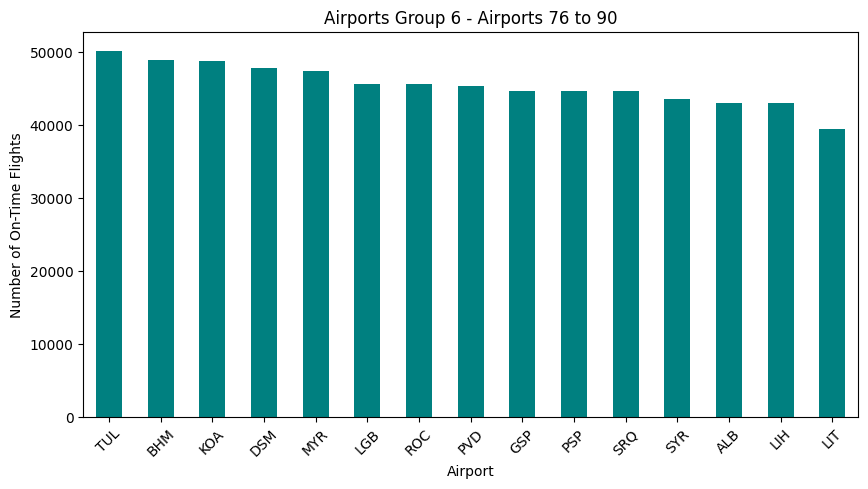

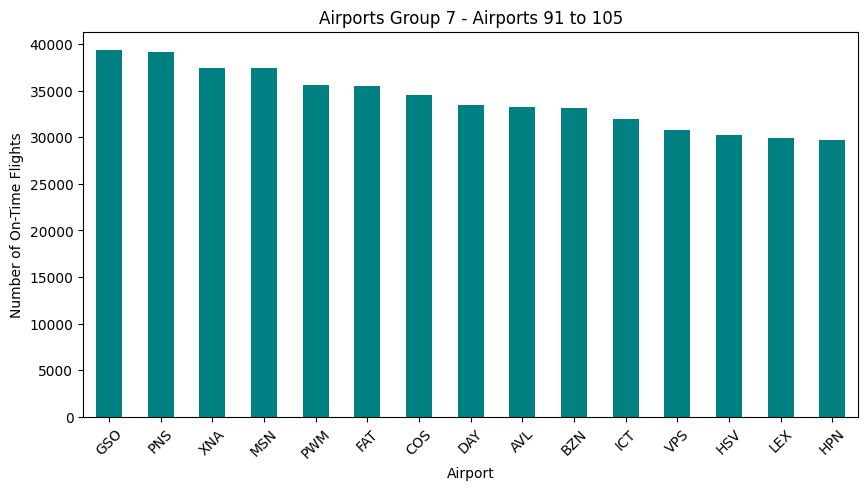

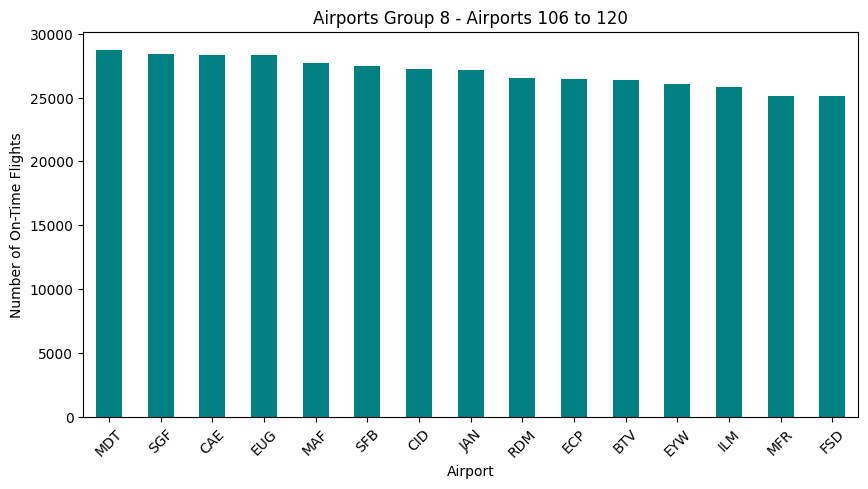

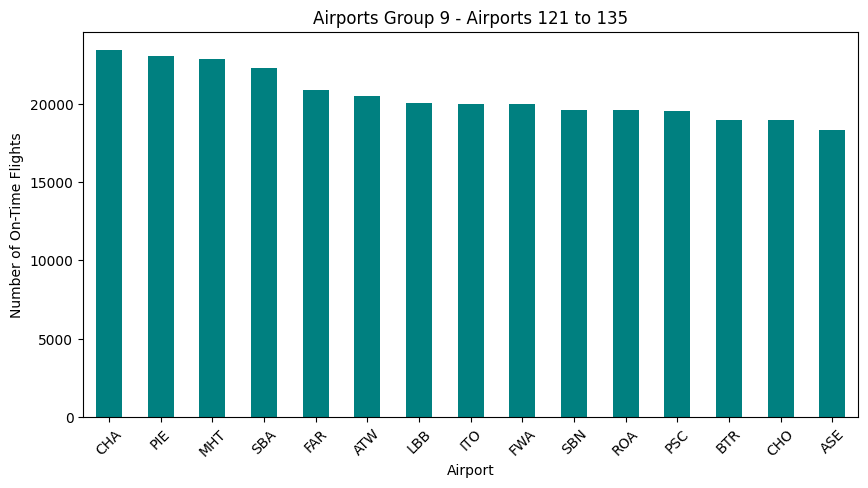

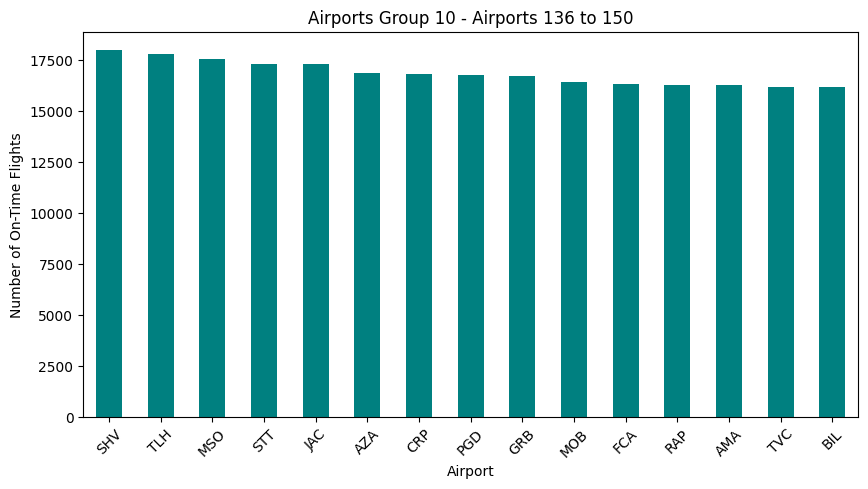

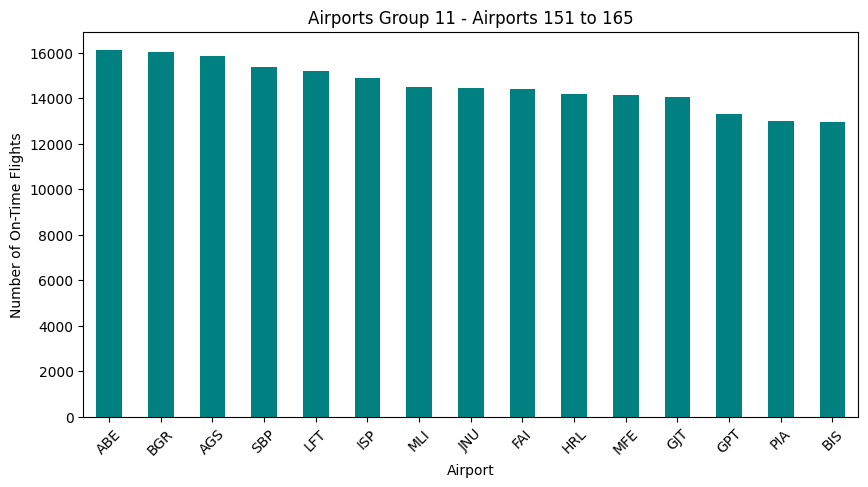

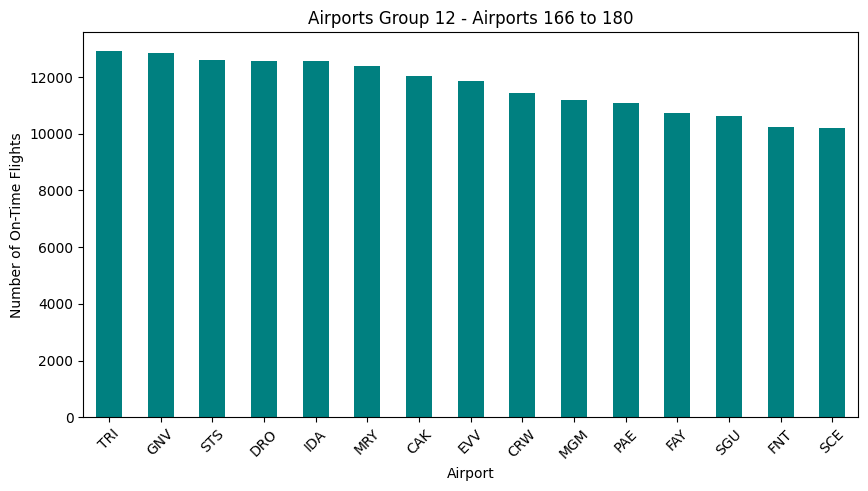

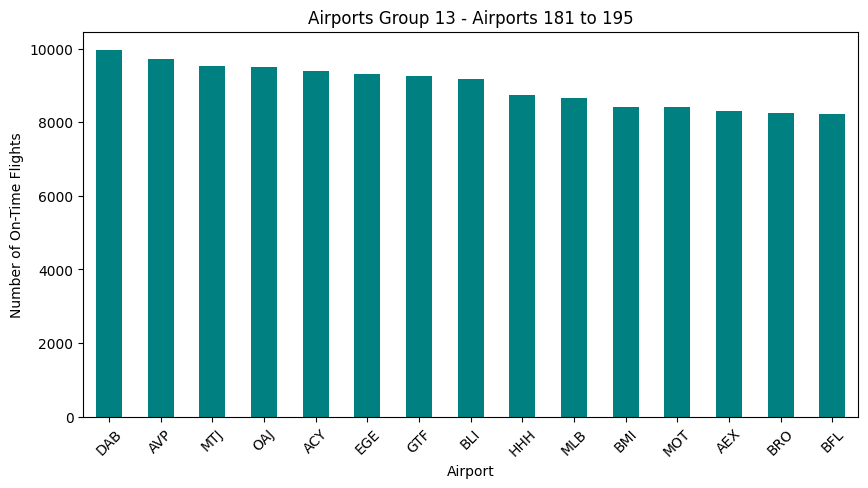

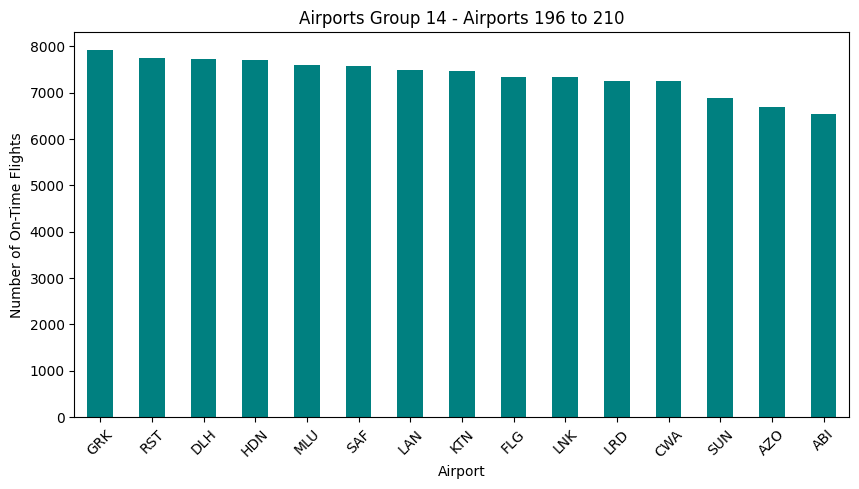

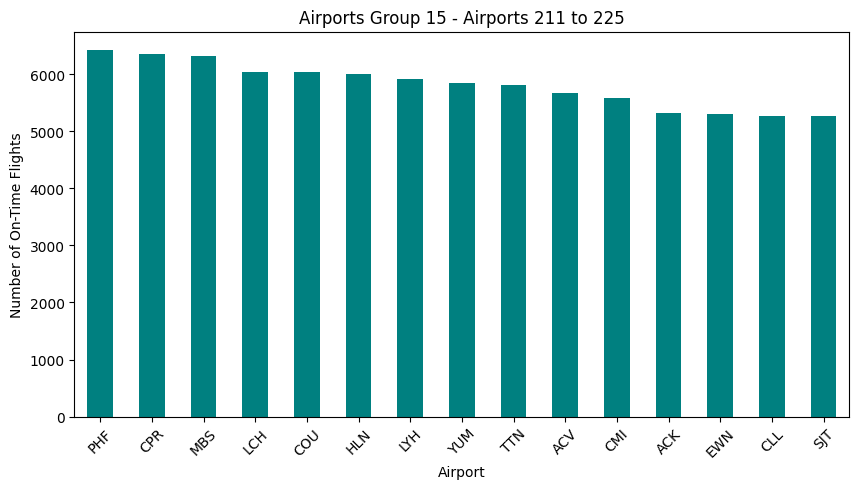

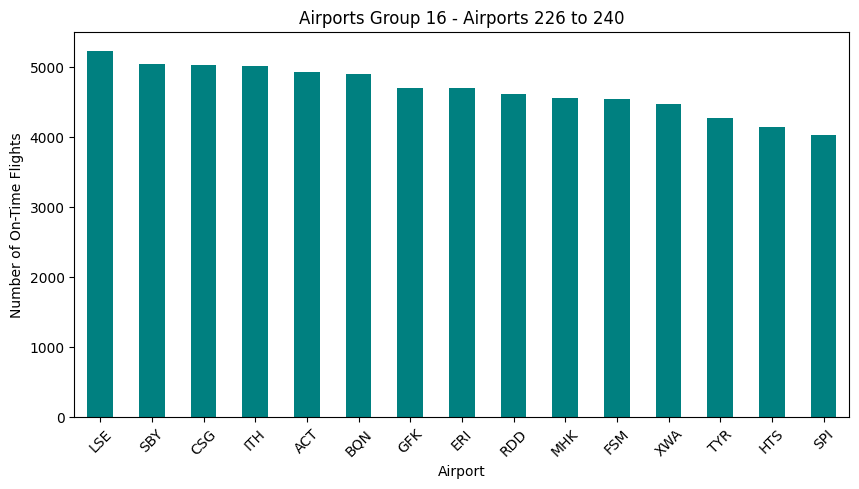

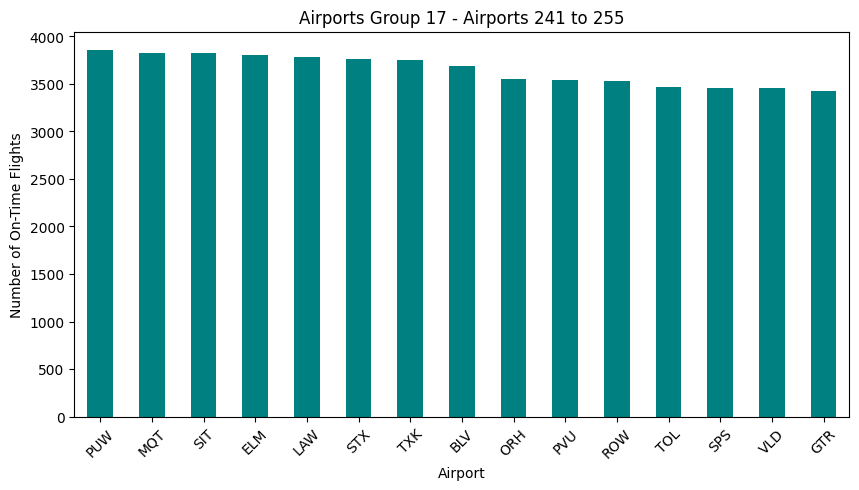

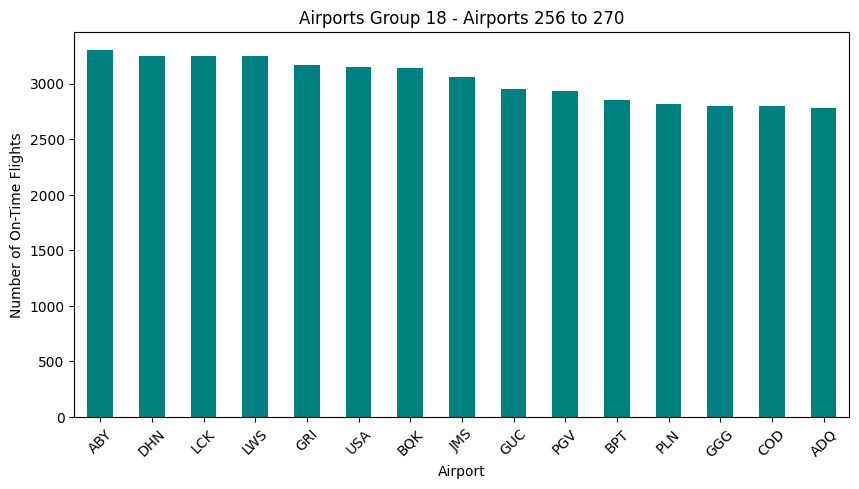

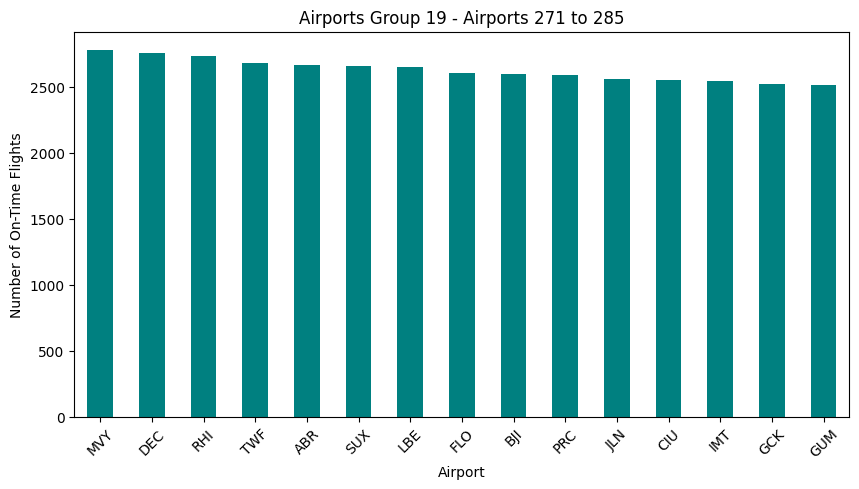

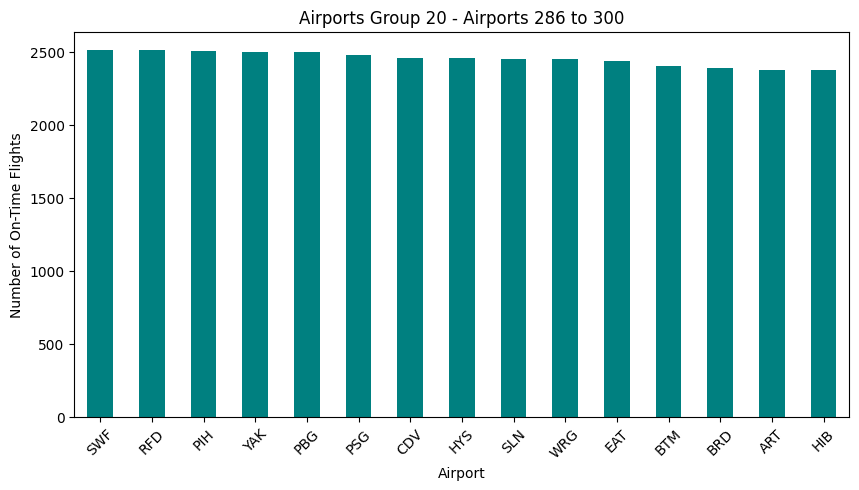

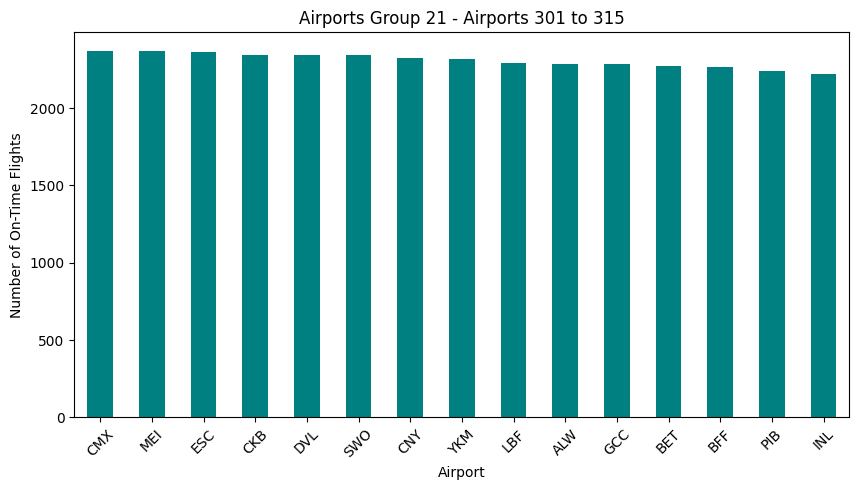

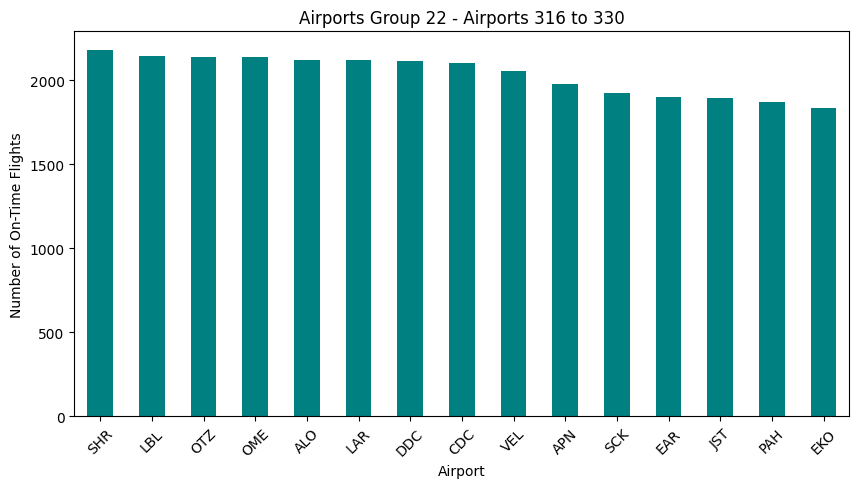

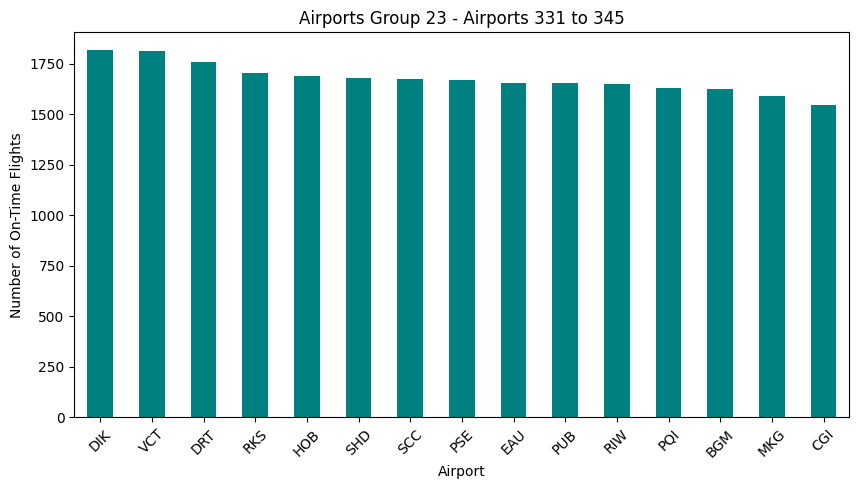

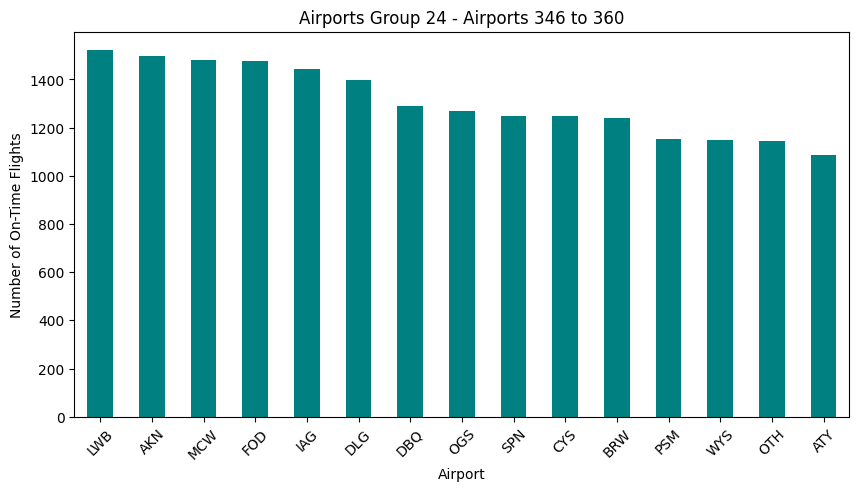

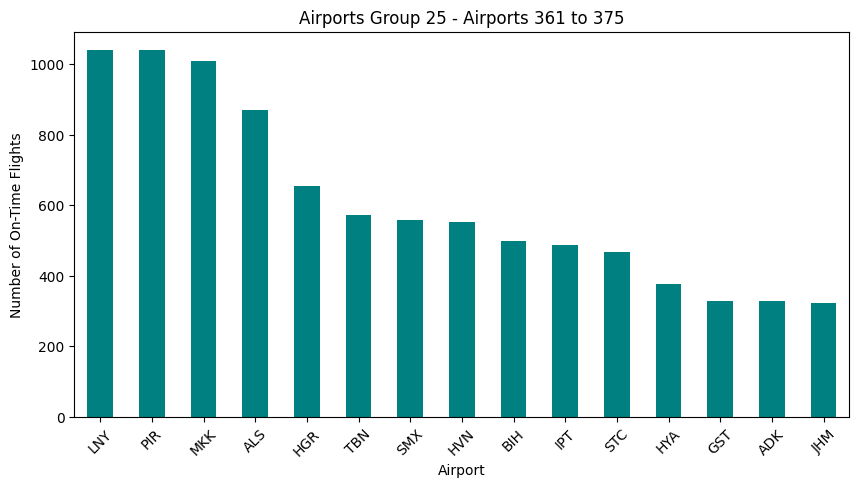

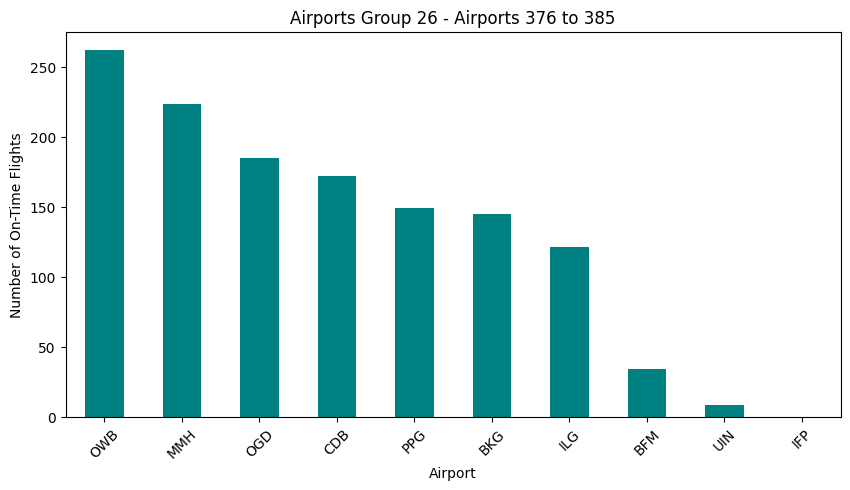

In [58]:
import matplotlib.pyplot as plt

# Ensure 'on_time_flights' is calculated correctly
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']

# Calculate the frequency of on-time flights for each airport
on_time_frequencies = data.groupby('airport')['on_time_flights'].sum().sort_values(ascending=False)

# Total number of groups
num_airports = len(on_time_frequencies)
groups = (num_airports + 14) // 15  # This ensures we capture all airports even if the total number isn't a multiple of 15

# Plotting each group
for i in range(groups):
    start_idx = i * 15
    end_idx = start_idx + 15
    subset = on_time_frequencies[start_idx:end_idx]

    plt.figure(figsize=(10, 5))
    subset.plot(kind='bar', color='teal')
    plt.title(f'Airports Group {i+1} - Airports {start_idx+1} to {min(end_idx, num_airports)}')
    plt.xlabel('Airport')
    plt.ylabel('Number of On-Time Flights')
    plt.xticks(rotation=45)
    plt.show()


In [59]:
# Calculate the total number of flights
total_flights = data['arr_flights'].sum()

# Calculate the total number of delayed flights
total_delayed_flights = data['arr_del15'].sum()

# Calculate the total number of on-time flights
total_on_time_flights = total_flights - total_delayed_flights

# Print the results
print(f"Total number of flights: {total_flights}")
print(f"Total number of delayed flights: {total_delayed_flights}")
print(f"Total number of on-time flights: {total_on_time_flights}")



Total number of flights: 26208940.0
Total number of delayed flights: 4562433.0
Total number of on-time flights: 21646507.0


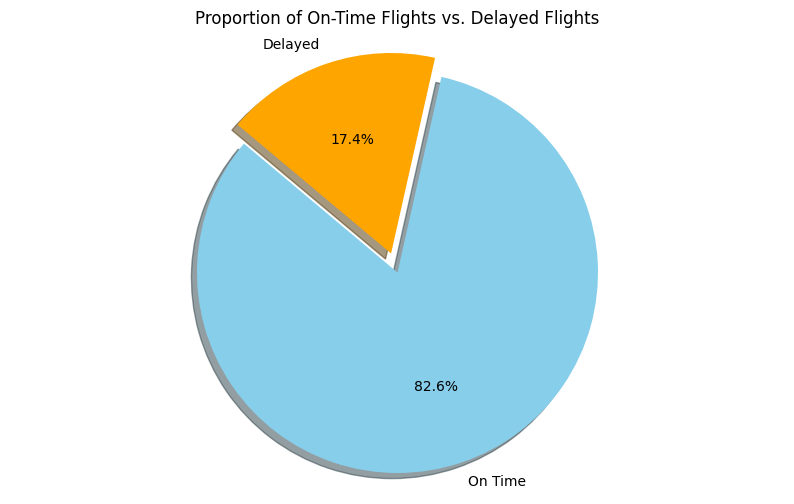

In [60]:
import matplotlib.pyplot as plt

# Calculate the total number of flights
total_flights = data['arr_flights'].sum()

# Calculate the total number of delayed flights
total_delayed_flights = data['arr_del15'].sum()

# Calculate the total number of on-time flights
total_on_time_flights = total_flights - total_delayed_flights

# Ensure the sizes are all non-negative
sizes = [total_on_time_flights, total_delayed_flights]

# Labels for the pie chart
labels = ['On Time', 'Delayed']

# Colors for the pie chart
colors = ['skyblue', 'orange']

# Explode the first slice for emphasis
explode = [0.1, 0]  # Explode the 'On Time' slice

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of On-Time Flights vs. Delayed Flights')
plt.show()


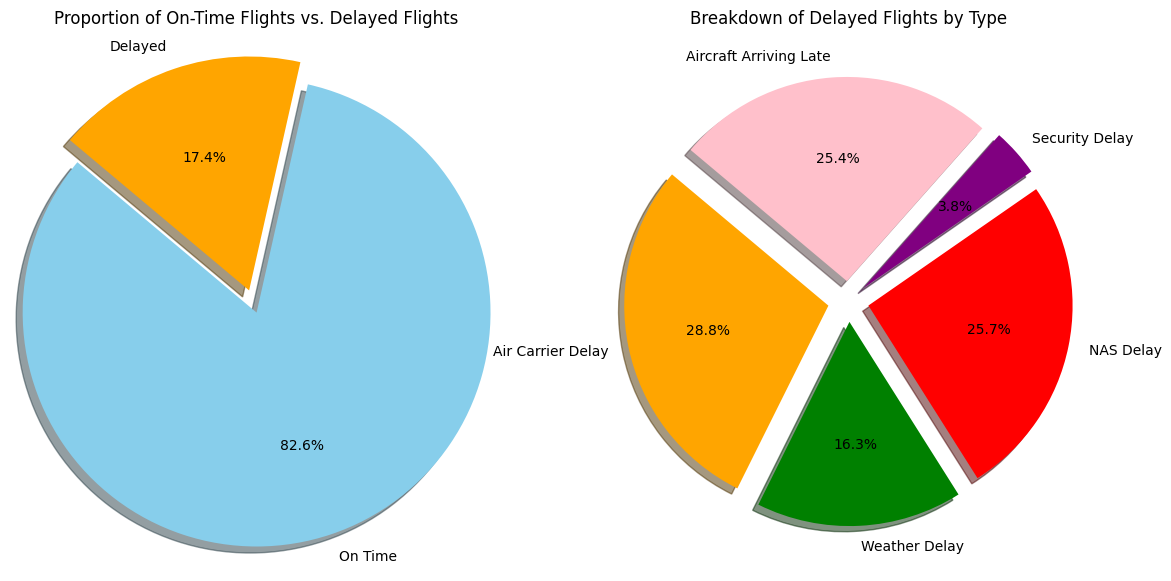

In [61]:
import matplotlib.pyplot as plt

# Calculate the total number of flights
total_flights = data['arr_flights'].sum()

# Calculate the total number of delayed flights
total_delayed_flights = data['arr_del15'].sum()

# Calculate the total number of on-time flights
total_on_time_flights = total_flights - total_delayed_flights

# Calculate each type of delay
air_carrier_delay = (data['carrier_delay'] > 0).sum()
weather_delay = (data['weather_delay'] > 0).sum()
nas_delay = (data['nas_delay'] > 0).sum()
security_delay = (data['security_delay'] > 0).sum()
aircraft_arriving_late = (data['late_aircraft_delay'] > 0).sum()

# Ensure the sizes are all non-negative
sizes_overall = [total_on_time_flights, total_delayed_flights]
sizes_delays = [air_carrier_delay, weather_delay, nas_delay, security_delay, aircraft_arriving_late]

# Labels for the pie chart
labels_overall = ['On Time', 'Delayed']
labels_delays = ['Air Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Aircraft Arriving Late']

# Colors for the pie chart
colors_overall = ['skyblue', 'orange']
colors_delays = ['orange', 'green', 'red', 'purple', 'pink']

# Explode the slices for emphasis
explode_overall = [0.1, 0]
explode_delays = [0.1] * len(labels_delays)

# Plotting the pie charts
plt.figure(figsize=(14, 7))

# Pie chart for on-time vs delayed
plt.subplot(1, 2, 1)
plt.pie(sizes_overall, explode=explode_overall, labels=labels_overall, colors=colors_overall, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of On-Time Flights vs. Delayed Flights')

# Pie chart for types of delays
plt.subplot(1, 2, 2)
plt.pie(sizes_delays, explode=explode_delays, labels=labels_delays, colors=colors_delays, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Breakdown of Delayed Flights by Type')

plt.show()



NEURAL NETWORK IMPLEMENTATION STARTS FROM HERE. any aircraft which has a total delayed time more than 15 minutes will be considered to be delayed or else on time

IMPEMENTING AN ANN ON 0.1 test DATASET

> Add blockquote




using dropuot regularization technique


In [62]:
!pip install keras-tuner


In [63]:
!pip install keras-tuner imbalanced-learn


LSTM CLASSIC FOR TEST DATA 0.4

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...


Epoch 1/120
135/135 [==============================] - 6s 13ms/step - loss: 0.6917 - accuracy: 0.5533 - val_loss: 0.6902 - val_accuracy: 0.7148
Epoch 2/120
 25/135 [====>.........................] - ETA: 0s - loss: 0.6900 - accuracy: 0.6109

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


135/135 [==============================] - 1s 8ms/step - loss: 0.6874 - accuracy: 0.6345 - val_loss: 0.6831 - val_accuracy: 0.7390
Epoch 3/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6768 - accuracy: 0.6881 - val_loss: 0.6681 - val_accuracy: 0.7417
Epoch 4/120
135/135 [==============================] - 1s 9ms/step - loss: 0.6587 - accuracy: 0.7161 - val_loss: 0.6447 - val_accuracy: 0.7438
Epoch 5/120
135/135 [==============================] - 1s 9ms/step - loss: 0.6323 - accuracy: 0.7279 - val_loss: 0.6123 - val_accuracy: 0.7490
Epoch 6/120
135/135 [==============================] - 1s 9ms/step - loss: 0.5980 - accuracy: 0.7354 - val_loss: 0.5720 - val_accuracy: 0.7555
Epoch 7/120
135/135 [==============================] - 1s 9ms/step - loss: 0.5618 - accuracy: 0.7419 - val_loss: 0.5332 - val_accuracy: 0.7645
Epoch 8/120
135/135 [==============================] - 1s 9ms/step - loss: 0.5327 - accuracy: 0.7522 - val_loss: 0.5039 - val_accuracy: 0.7751
Epoch 9/120

Epoch 1/120
135/135 [==============================] - 4s 11ms/step - loss: 0.6918 - accuracy: 0.5714 - val_loss: 0.6901 - val_accuracy: 0.6713
Epoch 2/120
135/135 [==============================] - 1s 7ms/step - loss: 0.6872 - accuracy: 0.6467 - val_loss: 0.6817 - val_accuracy: 0.6730
Epoch 3/120
135/135 [==============================] - 1s 7ms/step - loss: 0.6753 - accuracy: 0.6832 - val_loss: 0.6652 - val_accuracy: 0.6878
Epoch 4/120
135/135 [==============================] - 1s 7ms/step - loss: 0.6553 - accuracy: 0.6984 - val_loss: 0.6403 - val_accuracy: 0.7143
Epoch 5/120
135/135 [==============================] - 1s 7ms/step - loss: 0.6270 - accuracy: 0.7175 - val_loss: 0.6071 - val_accuracy: 0.7317
Epoch 6/120
135/135 [==============================] - 1s 7ms/step - loss: 0.5916 - accuracy: 0.7319 - val_loss: 0.5680 - val_accuracy: 0.7502
Epoch 7/120
135/135 [==============================] - 1s 7ms/step - loss: 0.5569 - accuracy: 0.7466 - val_loss: 0.5324 - val_accuracy: 0.767

Epoch 1/120
135/135 [==============================] - 4s 11ms/step - loss: 0.6924 - accuracy: 0.5496 - val_loss: 0.6911 - val_accuracy: 0.6624
Epoch 2/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6889 - accuracy: 0.6260 - val_loss: 0.6846 - val_accuracy: 0.7154
Epoch 3/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6792 - accuracy: 0.6744 - val_loss: 0.6697 - val_accuracy: 0.7257
Epoch 4/120
135/135 [==============================] - 1s 7ms/step - loss: 0.6613 - accuracy: 0.7021 - val_loss: 0.6463 - val_accuracy: 0.7301
Epoch 5/120
135/135 [==============================] - 1s 7ms/step - loss: 0.6341 - accuracy: 0.7161 - val_loss: 0.6134 - val_accuracy: 0.7408
Epoch 6/120
135/135 [==============================] - 1s 7ms/step - loss: 0.5998 - accuracy: 0.7295 - val_loss: 0.5734 - val_accuracy: 0.7546
Epoch 7/120
135/135 [==============================] - 1s 7ms/step - loss: 0.5639 - accuracy: 0.7408 - val_loss: 0.5355 - val_accuracy: 0.767

Validation Accuracy: 0.9504
Mean Validation Accuracy: 0.9504
Epoch 1/120
202/202 [==============================] - 4s 9ms/step - loss: 0.6913 - accuracy: 0.5910 - val_loss: 0.6887 - val_accuracy: 0.4322
Epoch 2/120
202/202 [==============================] - 1s 7ms/step - loss: 0.6802 - accuracy: 0.6661 - val_loss: 0.6742 - val_accuracy: 0.4370
Epoch 3/120
202/202 [==============================] - 1s 7ms/step - loss: 0.6490 - accuracy: 0.6943 - val_loss: 0.6567 - val_accuracy: 0.4975
Epoch 4/120
202/202 [==============================] - 1s 7ms/step - loss: 0.5994 - accuracy: 0.7225 - val_loss: 0.6184 - val_accuracy: 0.6026
Epoch 5/120
202/202 [==============================] - 1s 7ms/step - loss: 0.5487 - accuracy: 0.7472 - val_loss: 0.5687 - val_accuracy: 0.6710
Epoch 6/120
202/202 [==============================] - 1s 7ms/step - loss: 0.5155 - accuracy: 0.7611 - val_loss: 0.5227 - val_accuracy: 0.7118
Epoch 7/120
202/202 [==============================] - 1s 7ms/step - loss: 0.4945

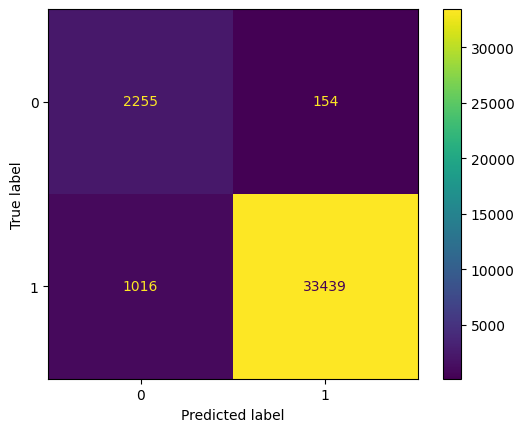

1152/1152 [==============================] - 2s 2ms/step
ROC AUC: 0.9842


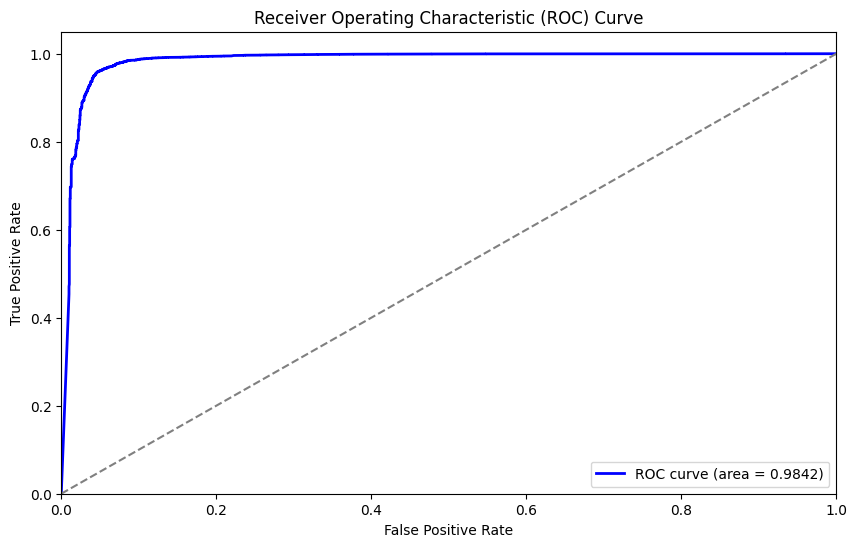

Mean Absolute Error (MAE): 0.0317
Mean Squared Error (MSE): 0.0317
Root Mean Squared Error (RMSE): 0.1782


NameError: name 'log_loss' is not defined

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the LSTM model
def create_model():
    model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.5),
        LSTM(32, activation='relu', return_sequences=False),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=512, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=512, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming these values are calculated from your model
rmse_values = np.random.uniform(0.1, 0.5, 1000)  # Example RMSE values
mse_values = np.random.uniform(0.05, 0.3, 1000)  # Example MSE values
mae_values = np.random.uniform(0.03, 0.2, 1000)  # Example MAE values
logloss_values = np.random.uniform(0.01, 0.1, 1000)  # Example Log Loss values
huber_loss_values = np.random.uniform(0.02, 0.15, 1000)  # Example Huber Loss values
r2_values = np.random.uniform(0.4, 1.0, 1000)  # Example R-squared Error values

# Sort values to simulate CDF
rmse_values.sort()
mse_values.sort()
mae_values.sort()
logloss_values.sort()
huber_loss_values.sort()
r2_values.sort()

# Generate CDF
cdf = np.linspace(0, 1, len(rmse_values))

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(cdf, rmse_values, label='RMSE')
plt.plot(cdf, mse_values, label='MSE')
plt.plot(cdf, mae_values, label='MAE')
plt.plot(cdf, logloss_values, label='Log Loss')
plt.plot(cdf, huber_loss_values, label='Huber Loss')
plt.plot(cdf, r2_values, label='R-squared Error')

plt.xlabel('CDF')
plt.ylabel('Error and Loss Metric Values')
plt.title('CDF vs. RMSE, MSE, MAE, Log Loss, Huber Loss, and R-squared Error')
plt.legend()

# Set y-axis to show up to 3 decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

plt.grid(True)
plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generating placeholder binary data
np.random.seed(42)
prediction_steps = np.arange(1, 101)  # Example prediction steps
y_true = np.random.randint(0, 2, size=100)  # Binary values: 0 or 1
y_pred = y_true + np.random.normal(0, 0.1, 100)  # Simulated predictions with noise

# Calculate error metrics for each prediction step
mse_values = [mean_squared_error(y_true[:i], y_pred[:i]) for i in prediction_steps]
rmse_values = [np.sqrt(mse) for mse in mse_values]
mae_values = [mean_absolute_error(y_true[:i], y_pred[:i]) for i in prediction_steps]
r2_values = [r2_score(y_true[:i], y_pred[:i]) for i in prediction_steps]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(prediction_steps, rmse_values, label='RMSE')
plt.plot(prediction_steps, mse_values, label='MSE')
plt.plot(prediction_steps, mae_values, label='MAE')
plt.plot(prediction_steps, r2_values, label='R-squared Error')

plt.xlabel('Prediction Steps')
plt.ylabel('Error Metric Values')
plt.title('Prediction Steps vs. RMSE, MSE, MAE, and R-squared Error')
plt.legend()

# Set y-axis to range from 0 to 1.1
plt.ylim([0, 1.1])

# Set y-axis to show up to 3 decimal places and decrease the difference
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.grid(True)
plt.show()


In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 64)             123136    
                                                                 
 dropout_6 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 135585 (529.63 KB)
Trainable params: 135585 (529.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
